In [1]:
import torch, sys
sys.path.append('../src/')
import os
import constants
from utils import utils
device = "cuda" if torch.cuda.is_available() else "cpu" 

2024-04-21 12:11:01,713 [DEBUG] matplotlib data path: /home_data/home/v-liudsh/miniconda3/envs/torch/lib/python3.8/site-packages/matplotlib/mpl-data
2024-04-21 12:11:01,721 [DEBUG] CONFIGDIR=/home_data/home/v-liudsh/.config/matplotlib
2024-04-21 12:11:01,724 [DEBUG] interactive is False
2024-04-21 12:11:01,725 [DEBUG] platform is linux
2024-04-21 12:11:01,809 [DEBUG] CACHEDIR=/home_data/home/v-liudsh/.cache/matplotlib
2024-04-21 12:11:01,813 [DEBUG] Using fontManager instance from /home_data/home/v-liudsh/.cache/matplotlib/fontlist-v330.json


In [2]:
densenet_contrastive_p = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/None_dis_diag_des_False_densenet_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True_False/tensor.pth"
densenet_only_APPA_p = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/None_basic_True_densenet_None_False_NA_False_False_False_False_NA_S1_1_1_1_1_0_True/tensor.pth"

biomed_trainable_vision_only_APPA_p = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/biomedclip_dis_diag_des_True_None_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True_True/tensor.pth"
biomed_trainable_APPA_p = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/biomedclip_dis_diag_des_False_None_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True_True/tensor.pth"


biomed_APPA_p = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/biomedclip_dis_diag_des_False_None_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True/tensor.pth"


bio_des_diag_appa_trainable_P = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/biomedclip_dis_diag_des_False_None_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True_True/tensor.pth"
bio_des_diag_appa_fixed_P = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/biomedclip_dis_diag_des_False_None_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True/tensor.pth"

bio_basic_appa_trainable_P = '/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/biomedclip_basic_False_None_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True_True_False/tensor.pth'
bio_basic_appa_fixed_P = '/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/biomedclip_basic_False_None_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True_False/tensor.pth'


densenet_contrastive = torch.load(densenet_contrastive_p, map_location=torch.device(device))
densenet_only_APPA = torch.load(densenet_only_APPA_p, map_location=torch.device(device))

biomed_trainable_vision_only_APPA = torch.load(biomed_trainable_vision_only_APPA_p, map_location=torch.device(device))
biomed_trainable_APPA = torch.load(biomed_trainable_APPA_p, map_location=torch.device(device))

biomed_APPA = torch.load(biomed_APPA_p, map_location=torch.device(device))

bio_des_diag_appa_trainable= torch.load(bio_des_diag_appa_trainable_P, map_location=torch.device(device))
bio_des_diag_appa_fixed = torch.load(bio_des_diag_appa_fixed_P, map_location=torch.device(device))

bio_basic_appa_trainable = torch.load(bio_basic_appa_trainable_P, map_location=torch.device(device))
bio_basic_appa_fixed = torch.load(bio_basic_appa_fixed_P, map_location=torch.device(device))


In [3]:
def plot_confusion_result(tensor_name, suptitle =  None, save = False) :
  tensor_name
  prediction =  (tensor_name["predictions"])
  labels = densenet_contrastive["labels"]
  prediction = torch.sigmoid(prediction)
  threshold = 0.5
  binary_labels = (prediction >= threshold).float()

  mcm = utils.get_confusion_matrix(labels, binary_labels)
  utils.plot_confusion(mcm, suptitle, save = save)
  return mcm

    

---
### save png for analysis


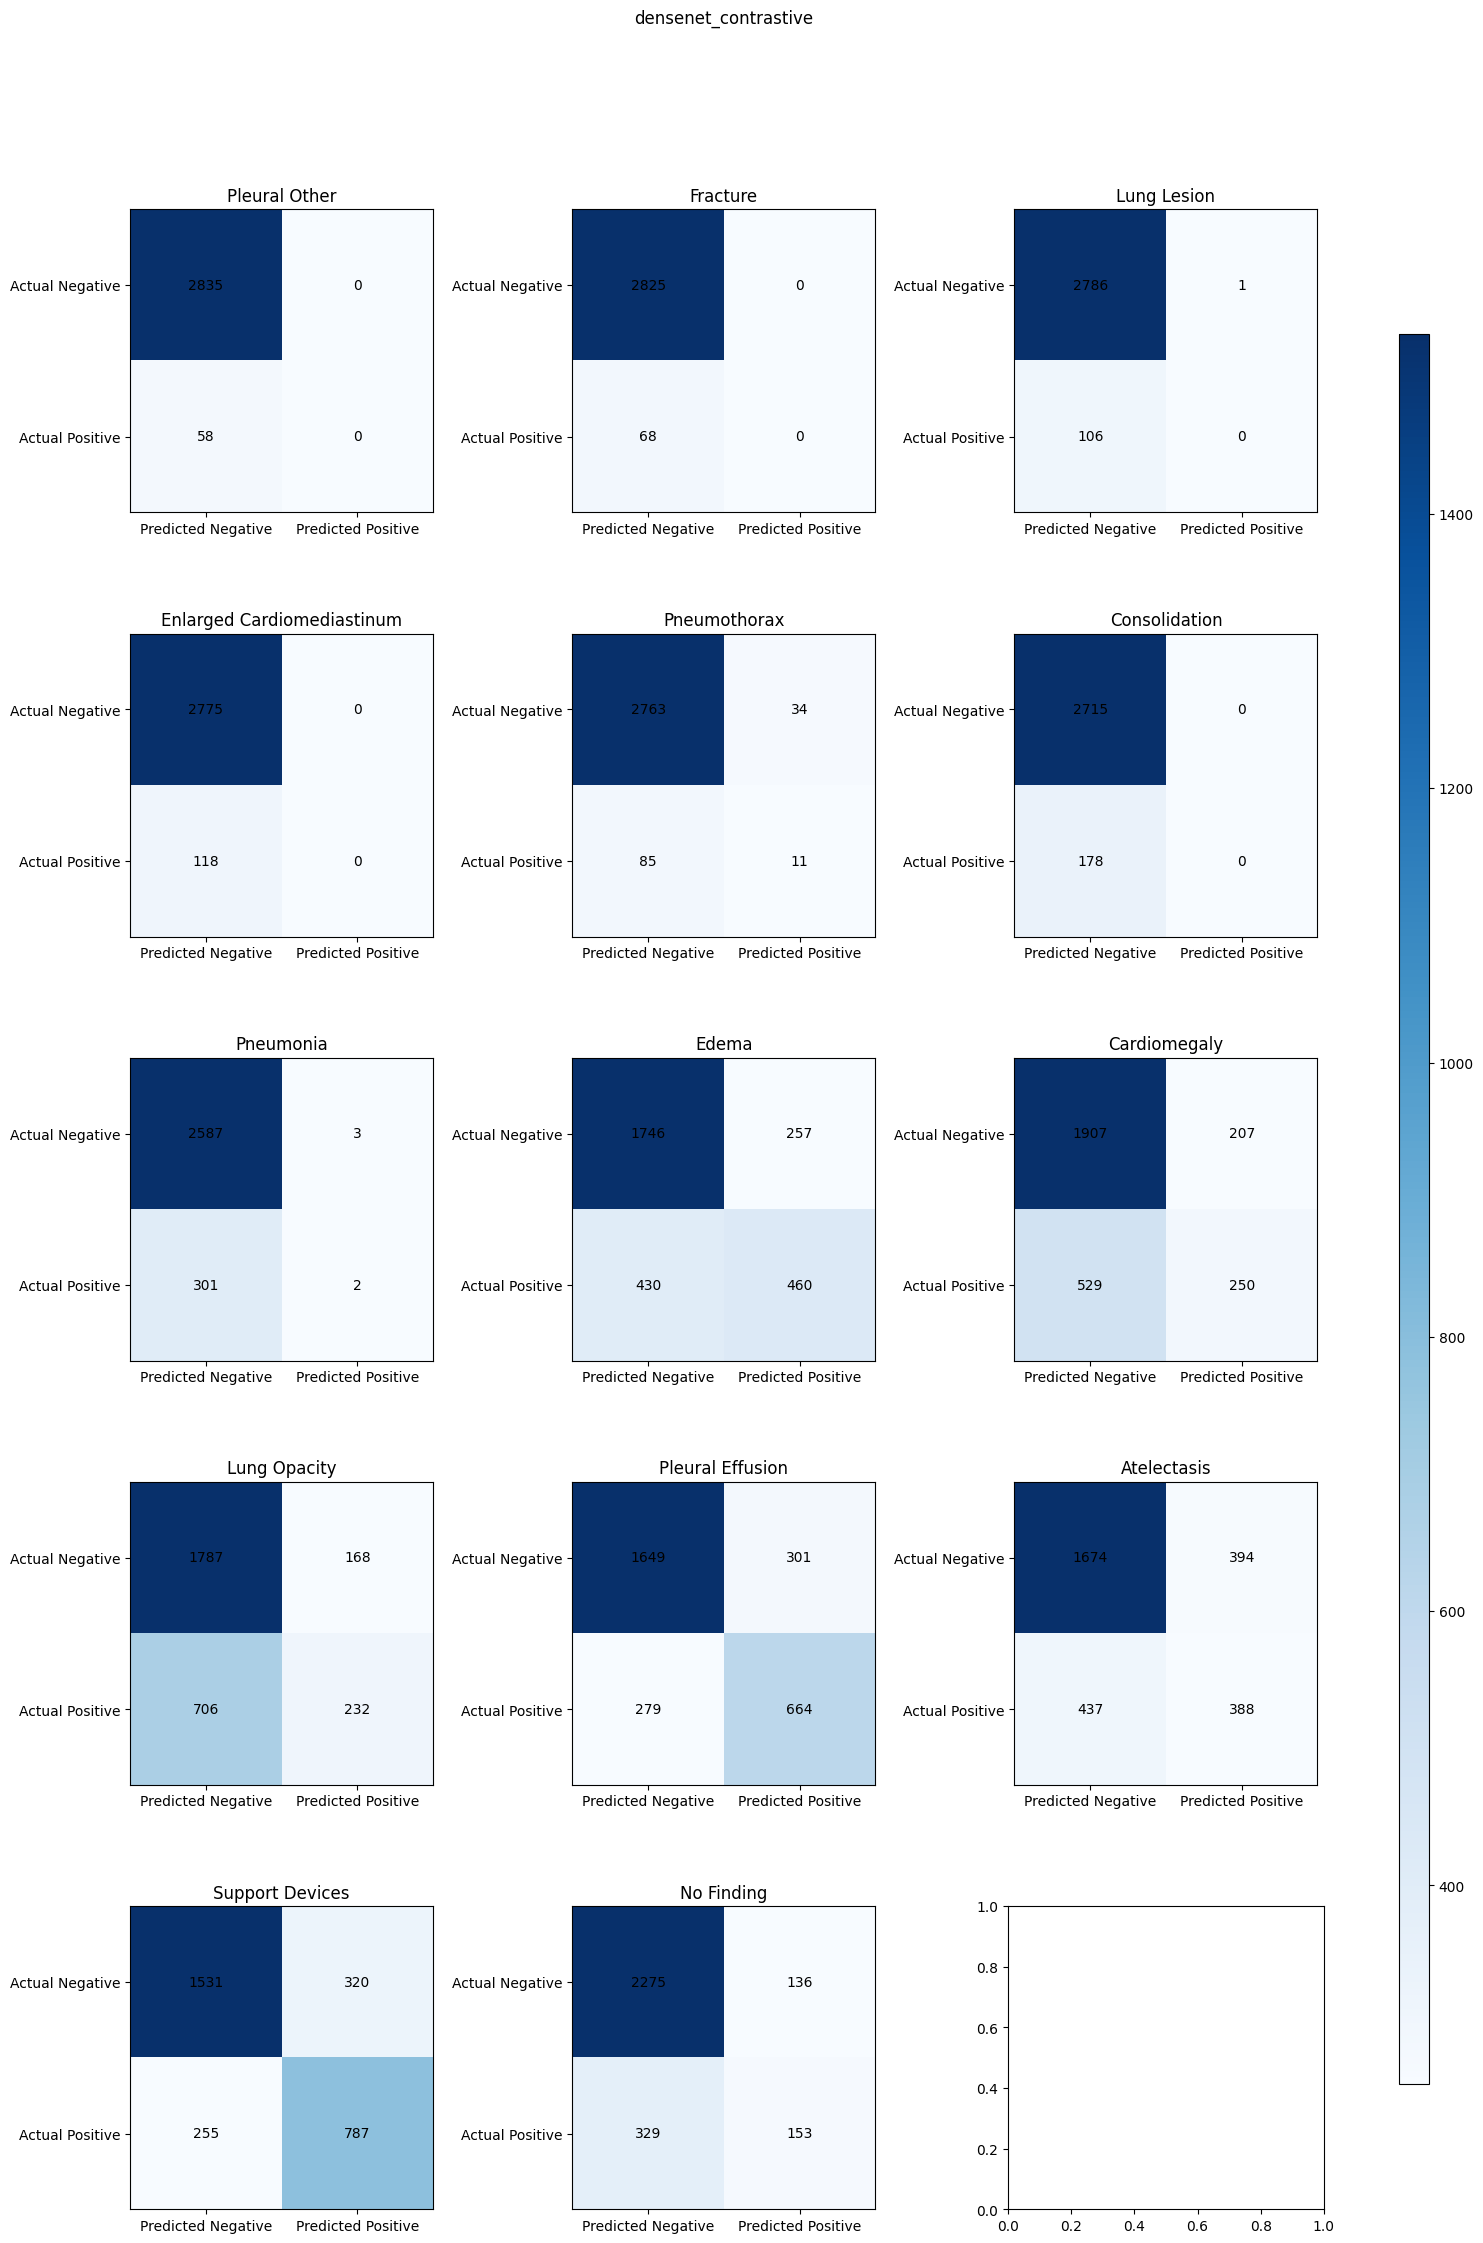

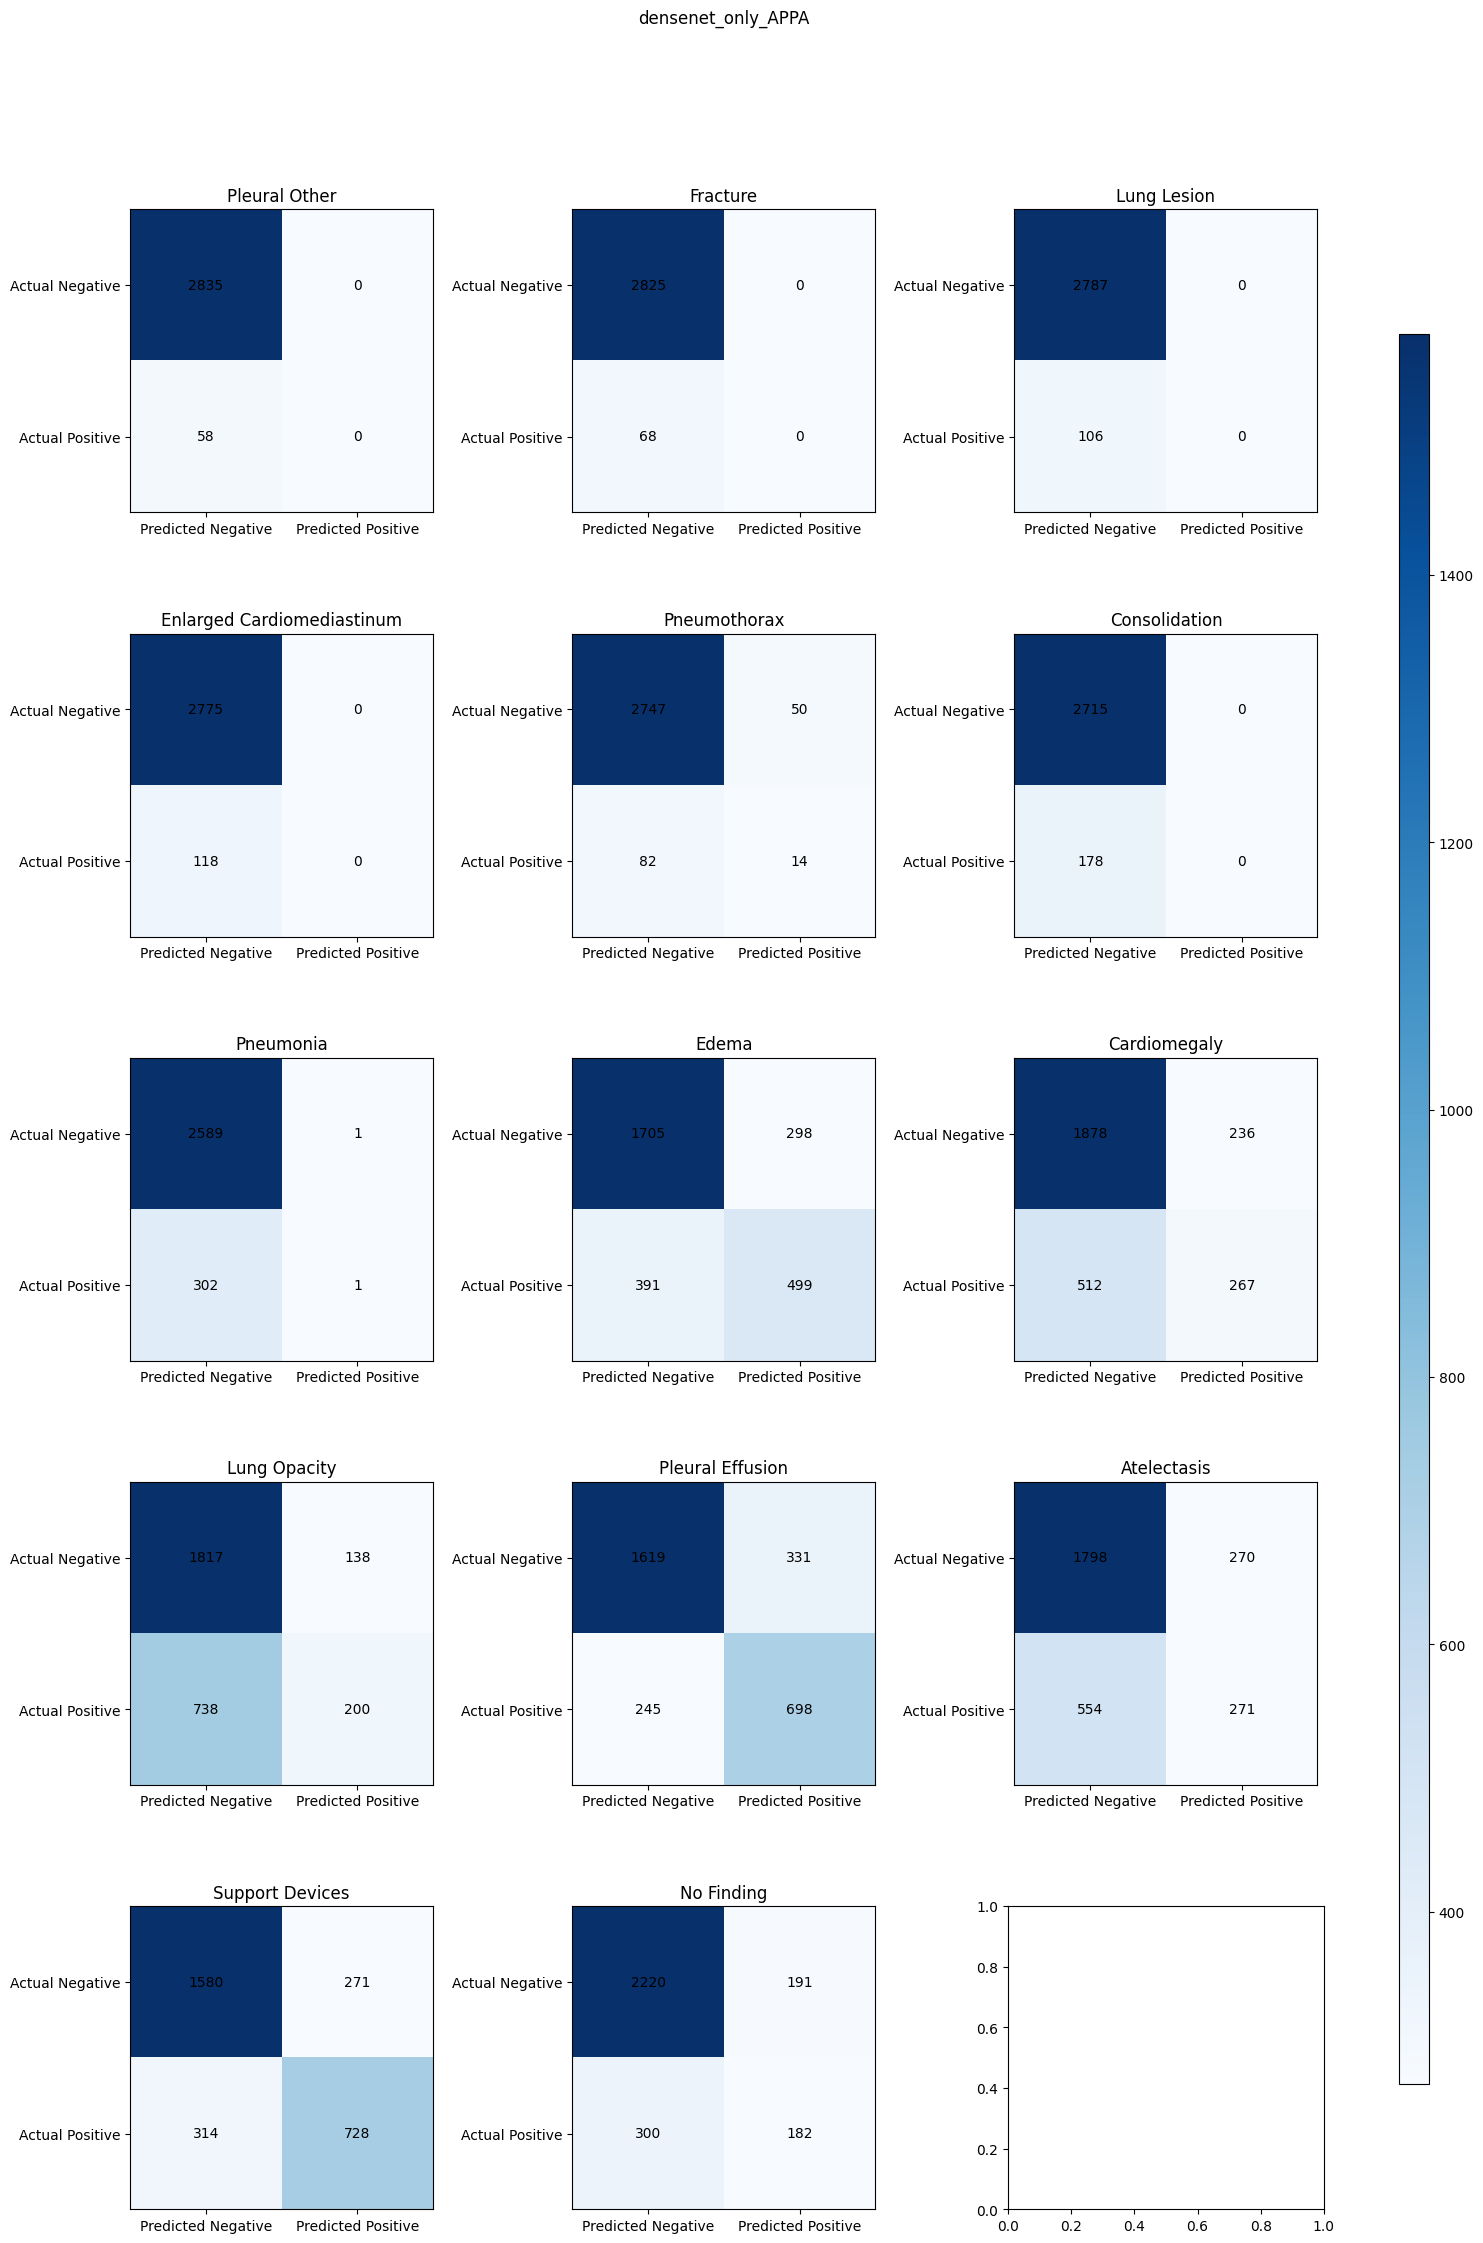

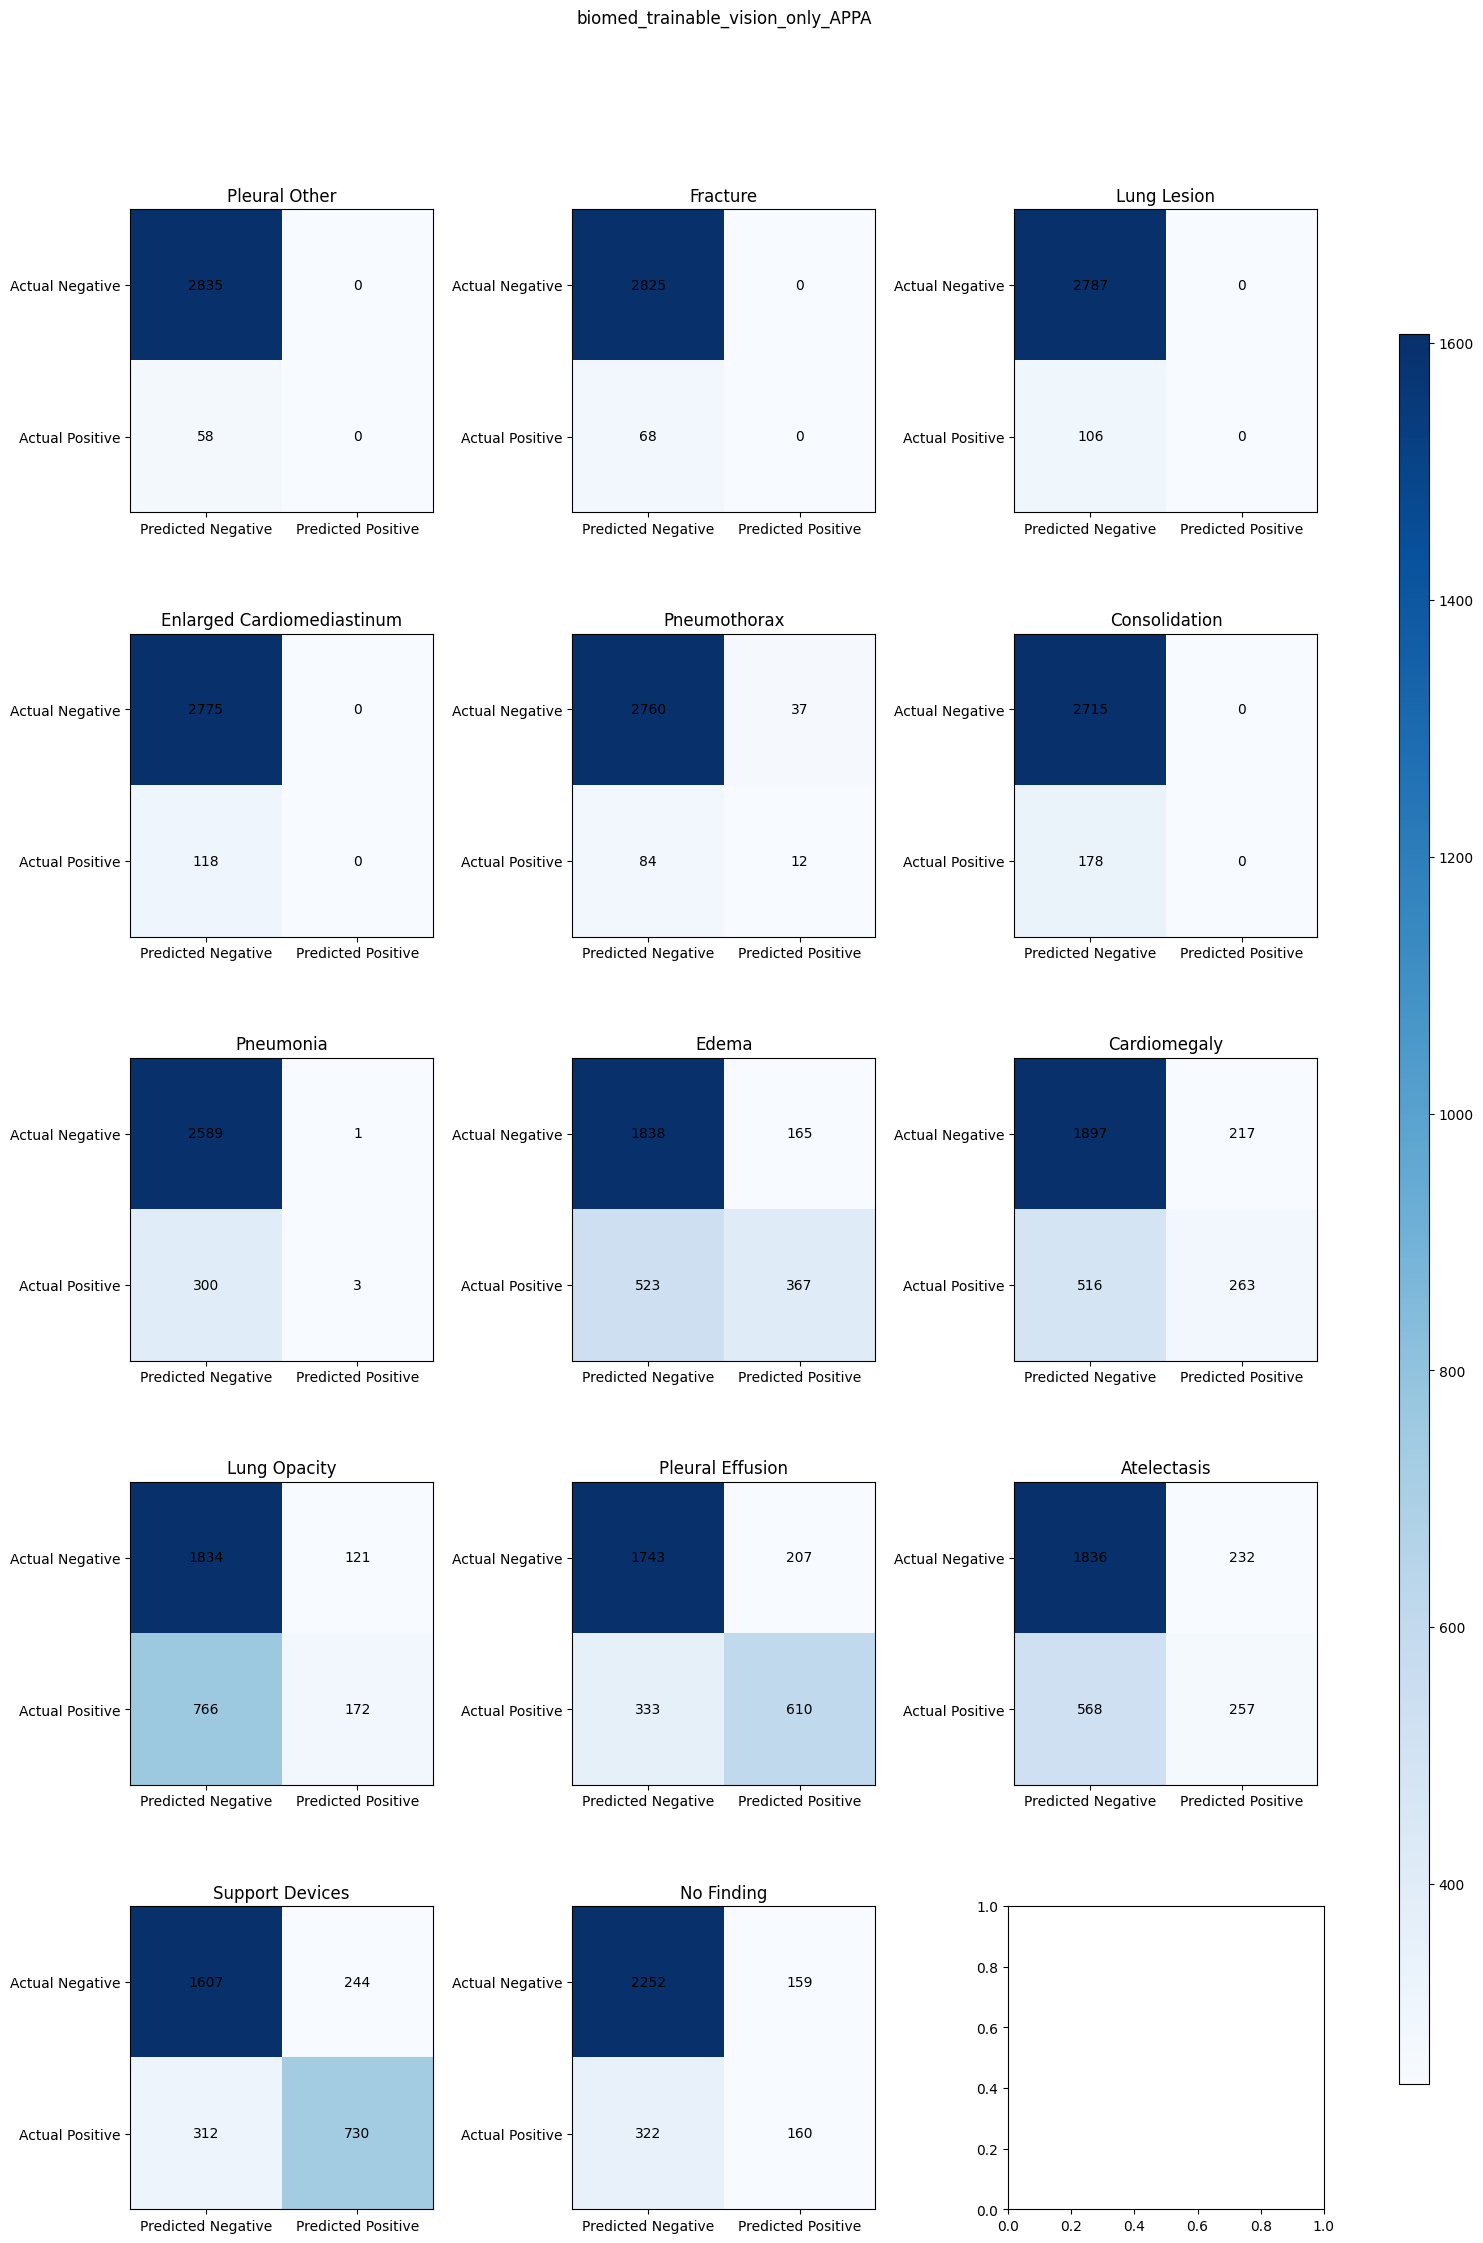

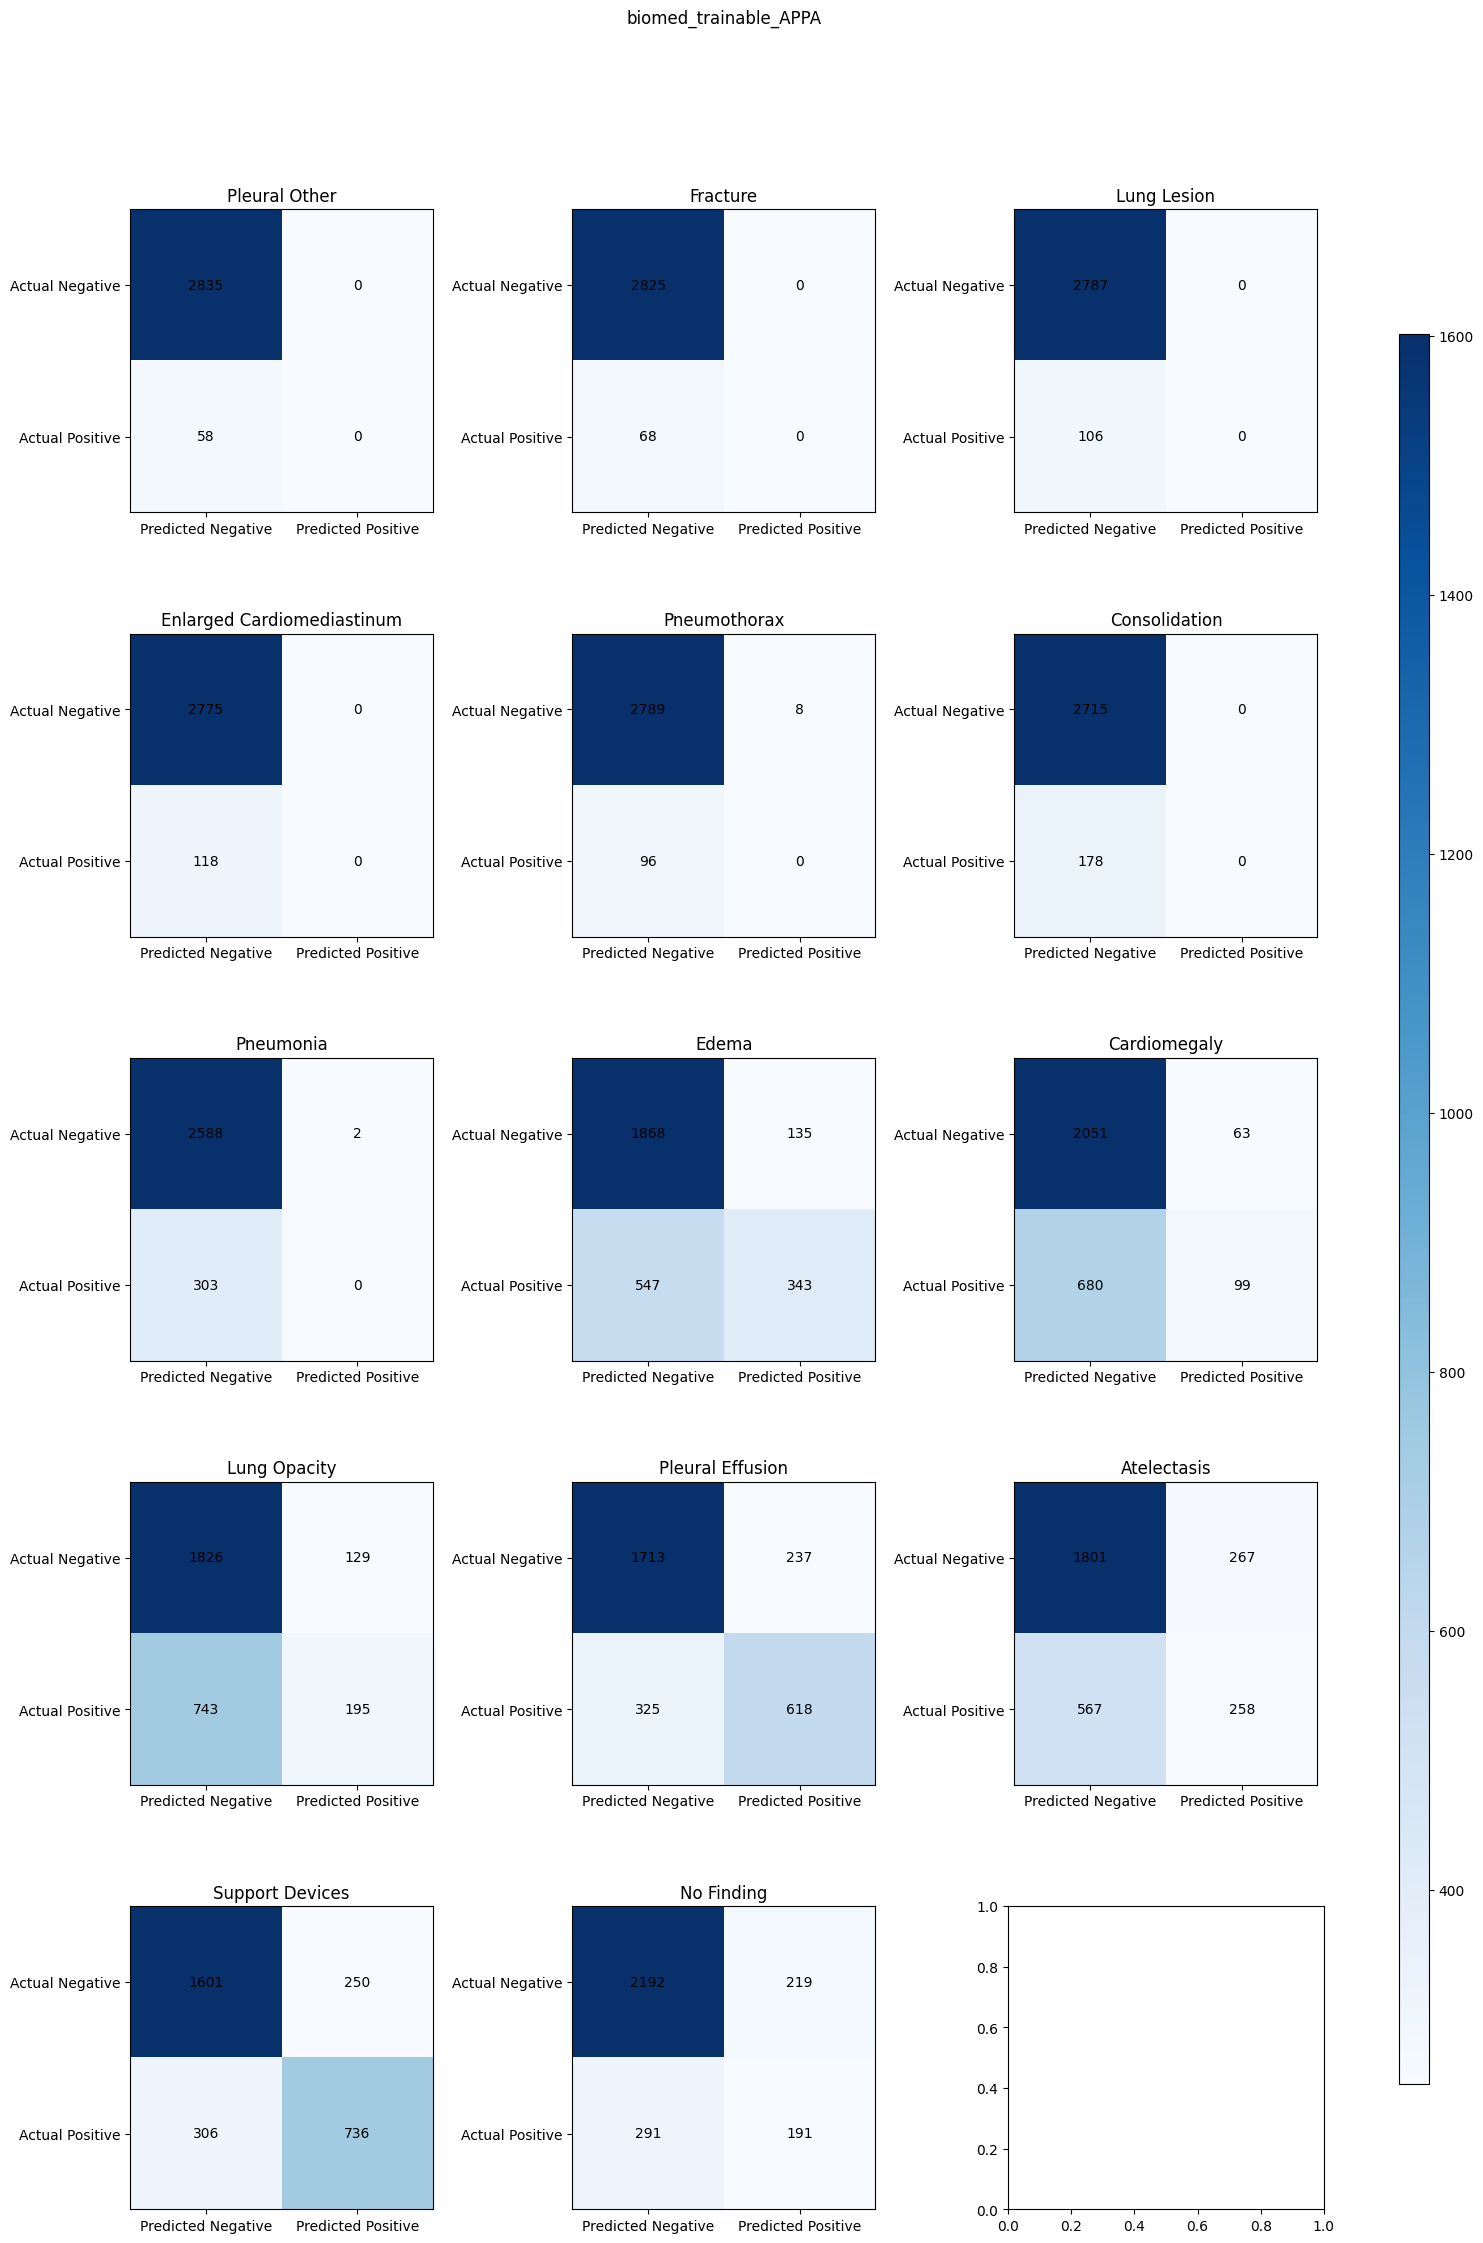

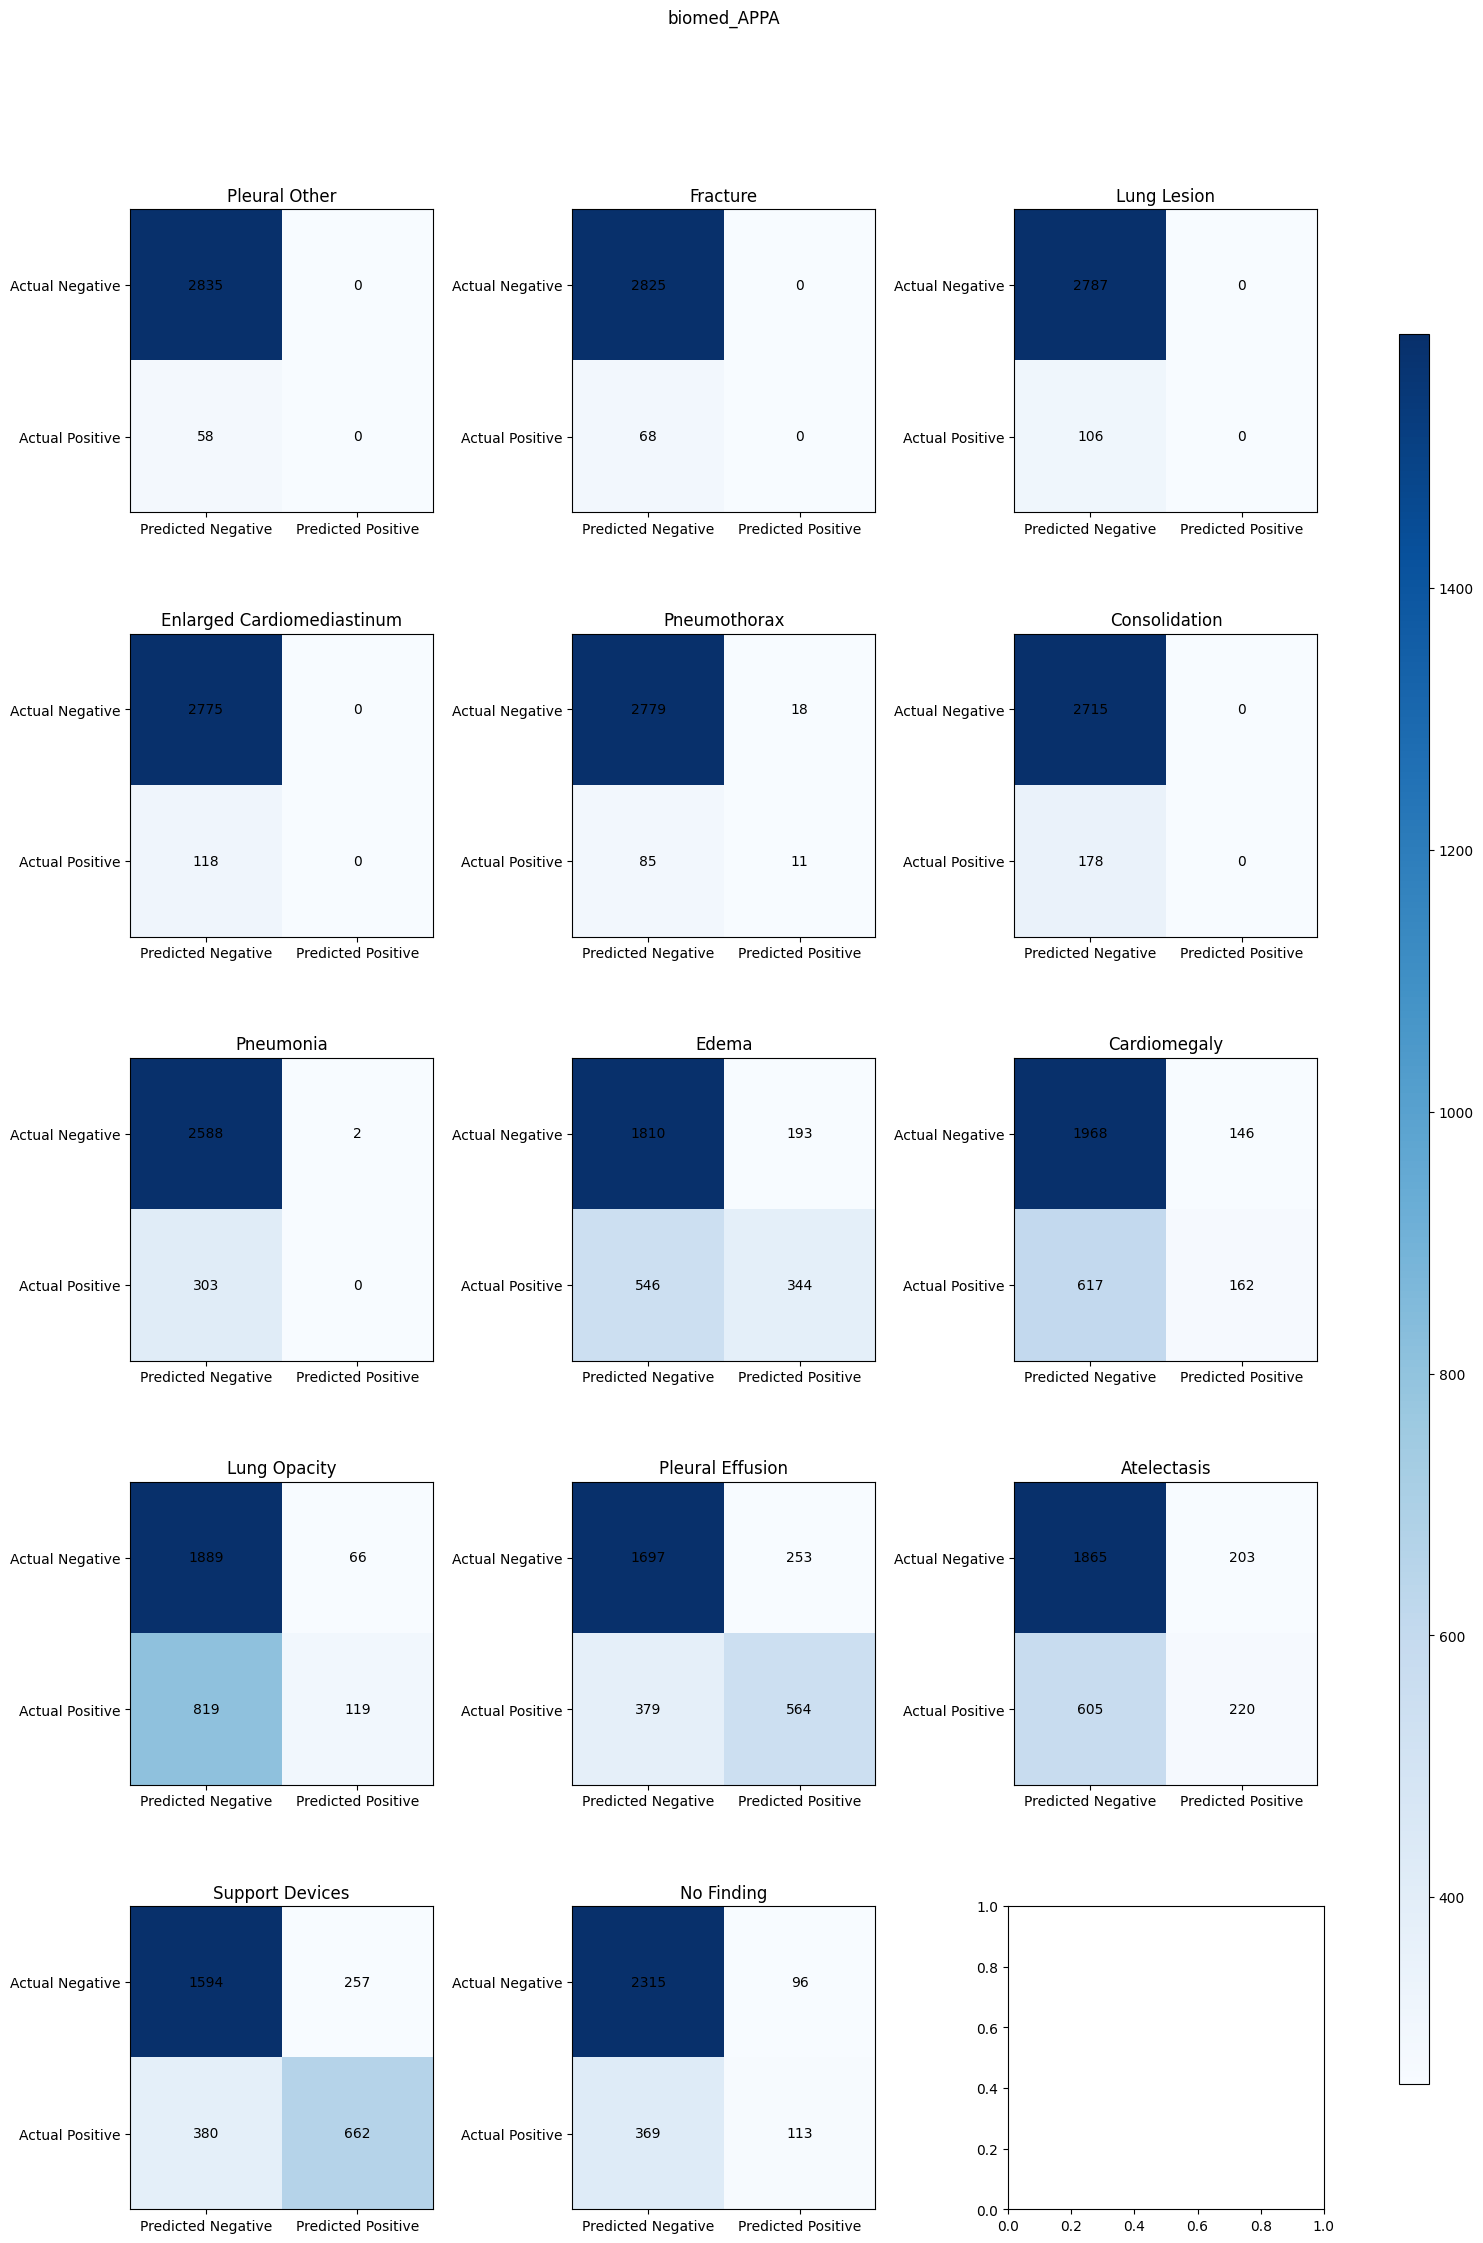

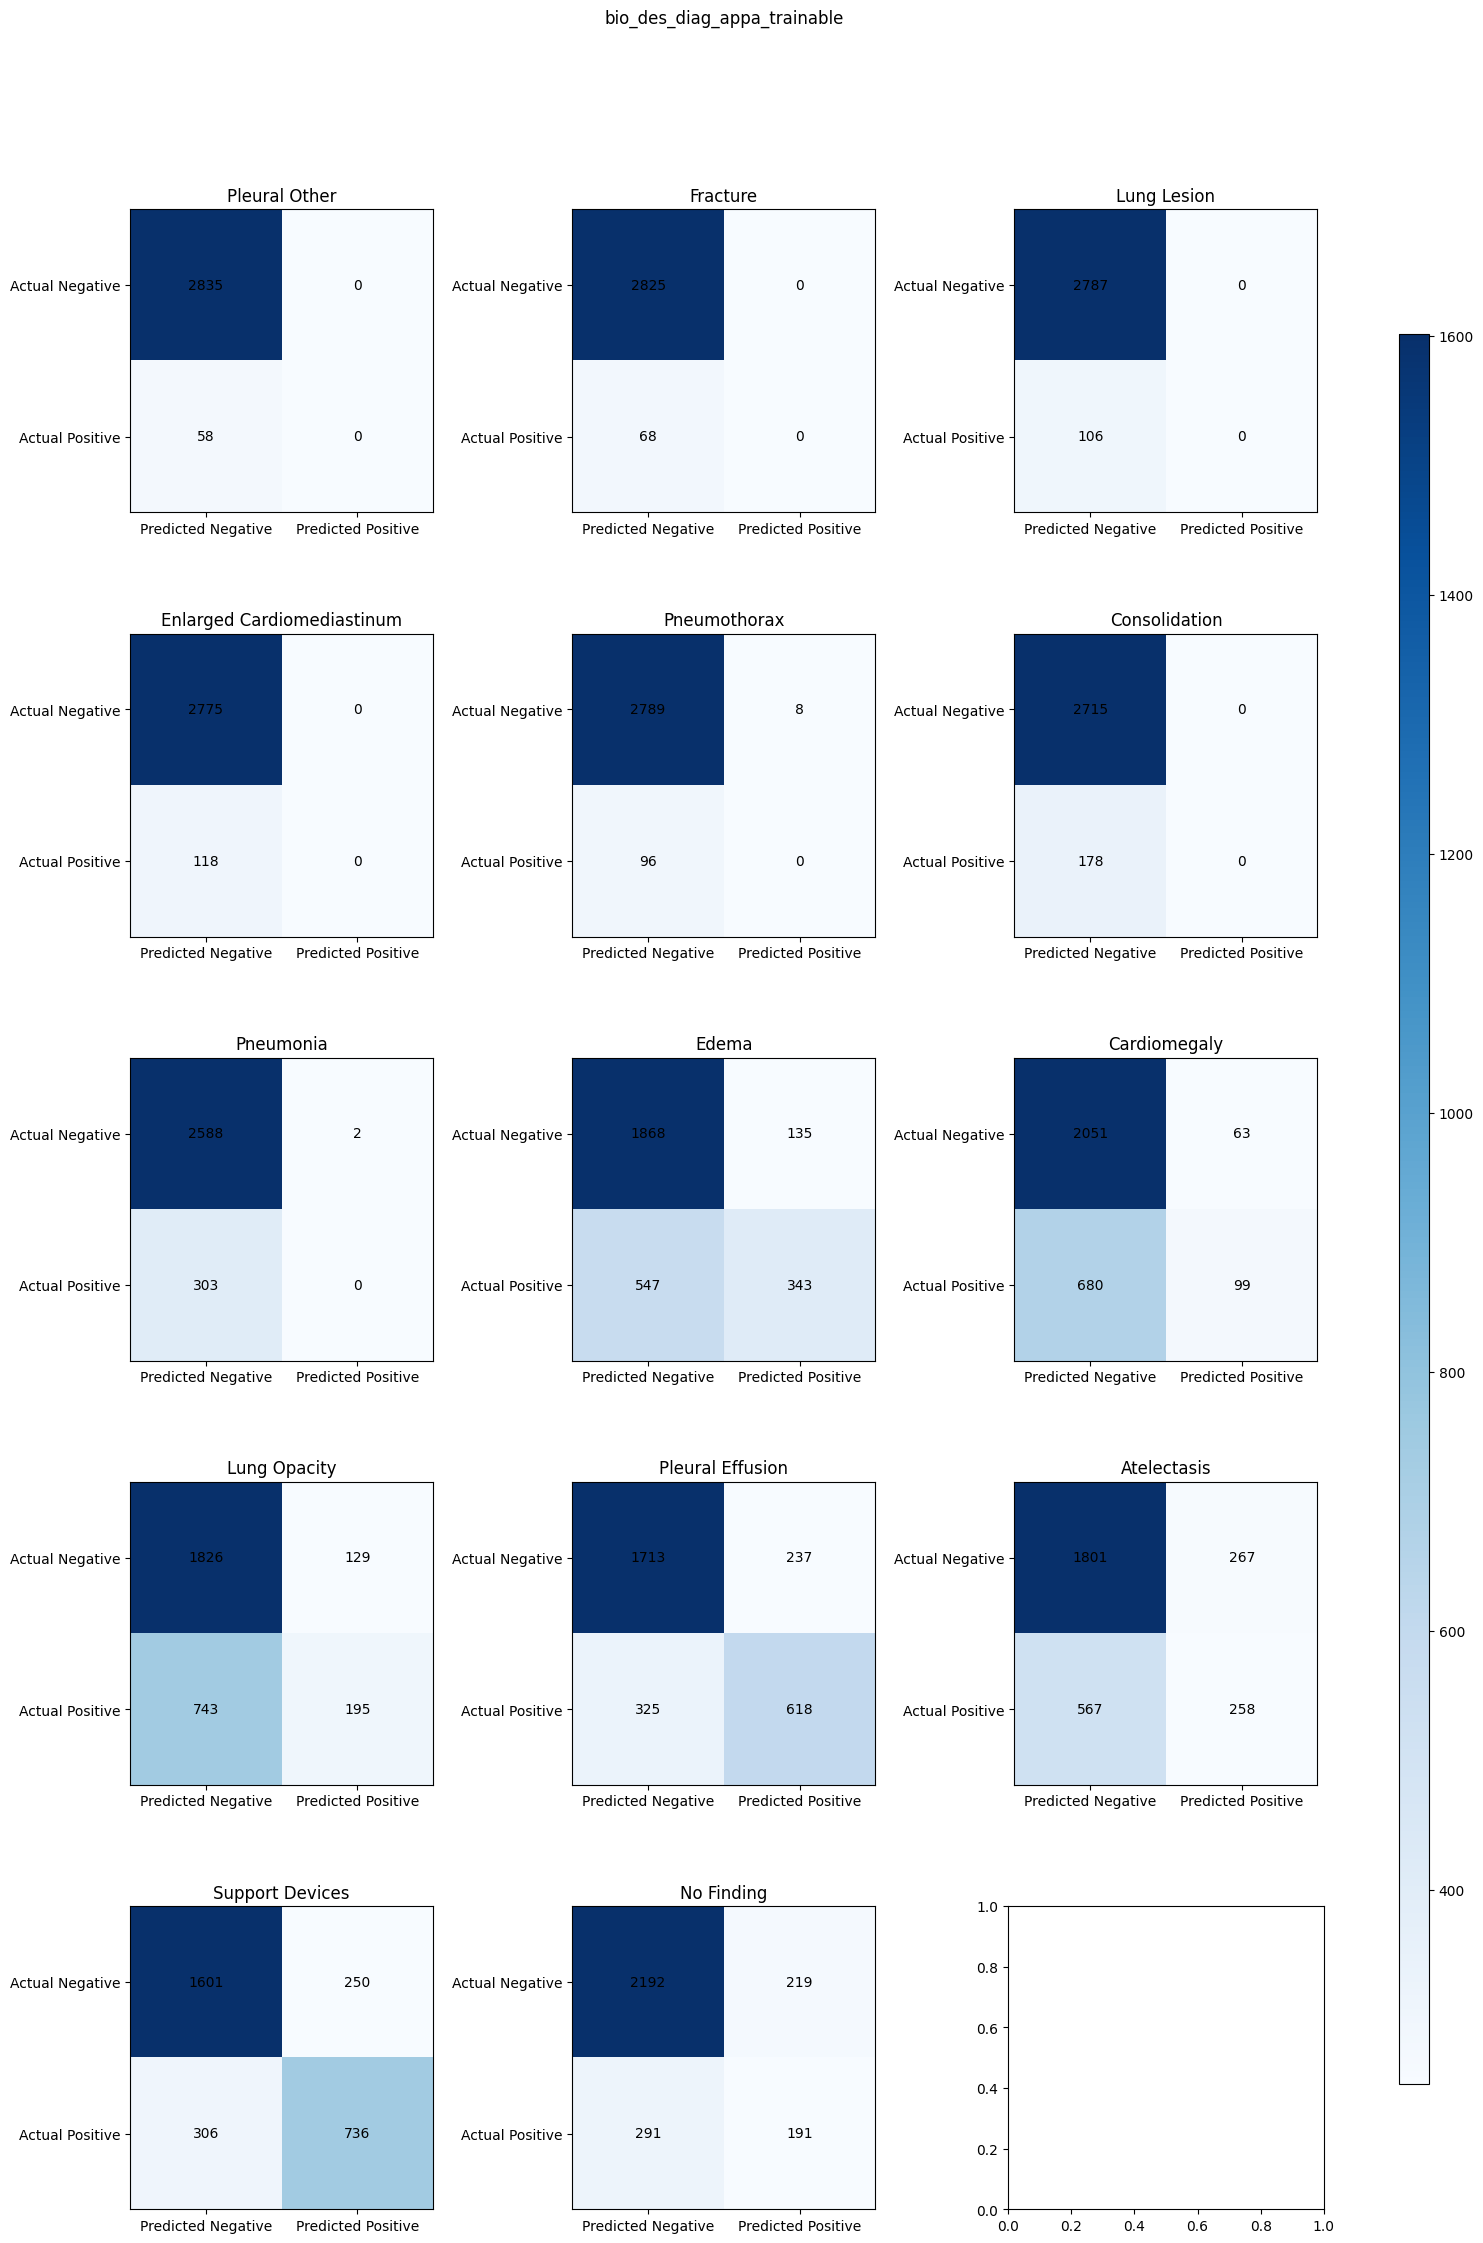

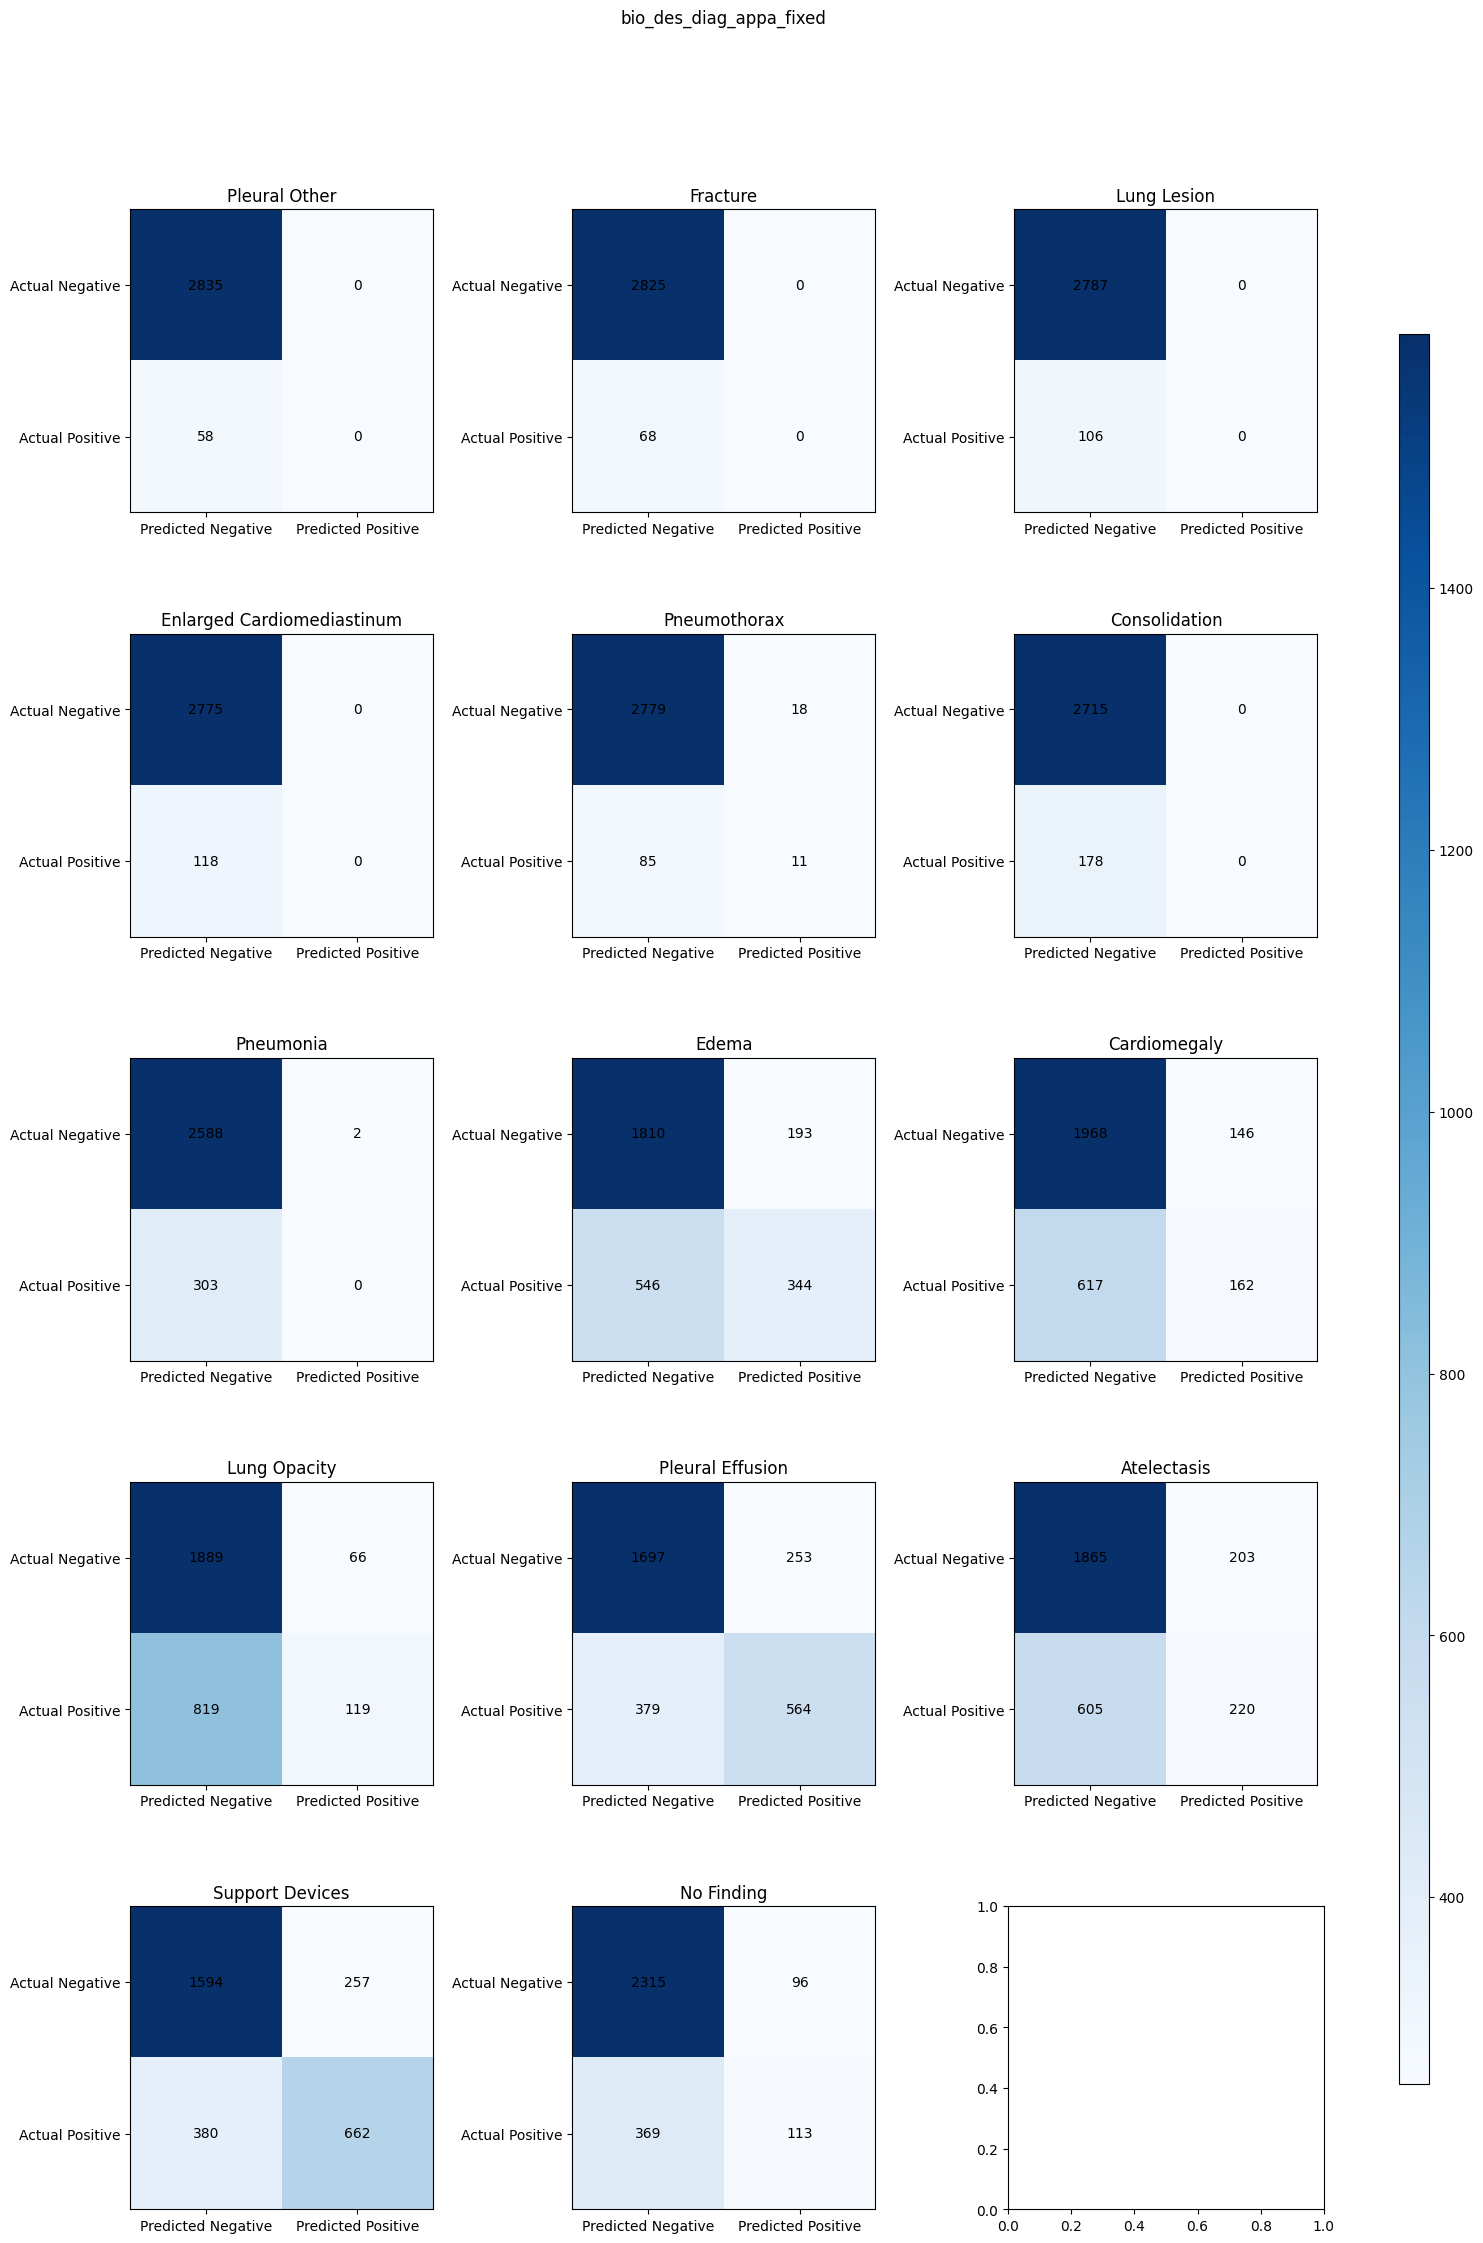

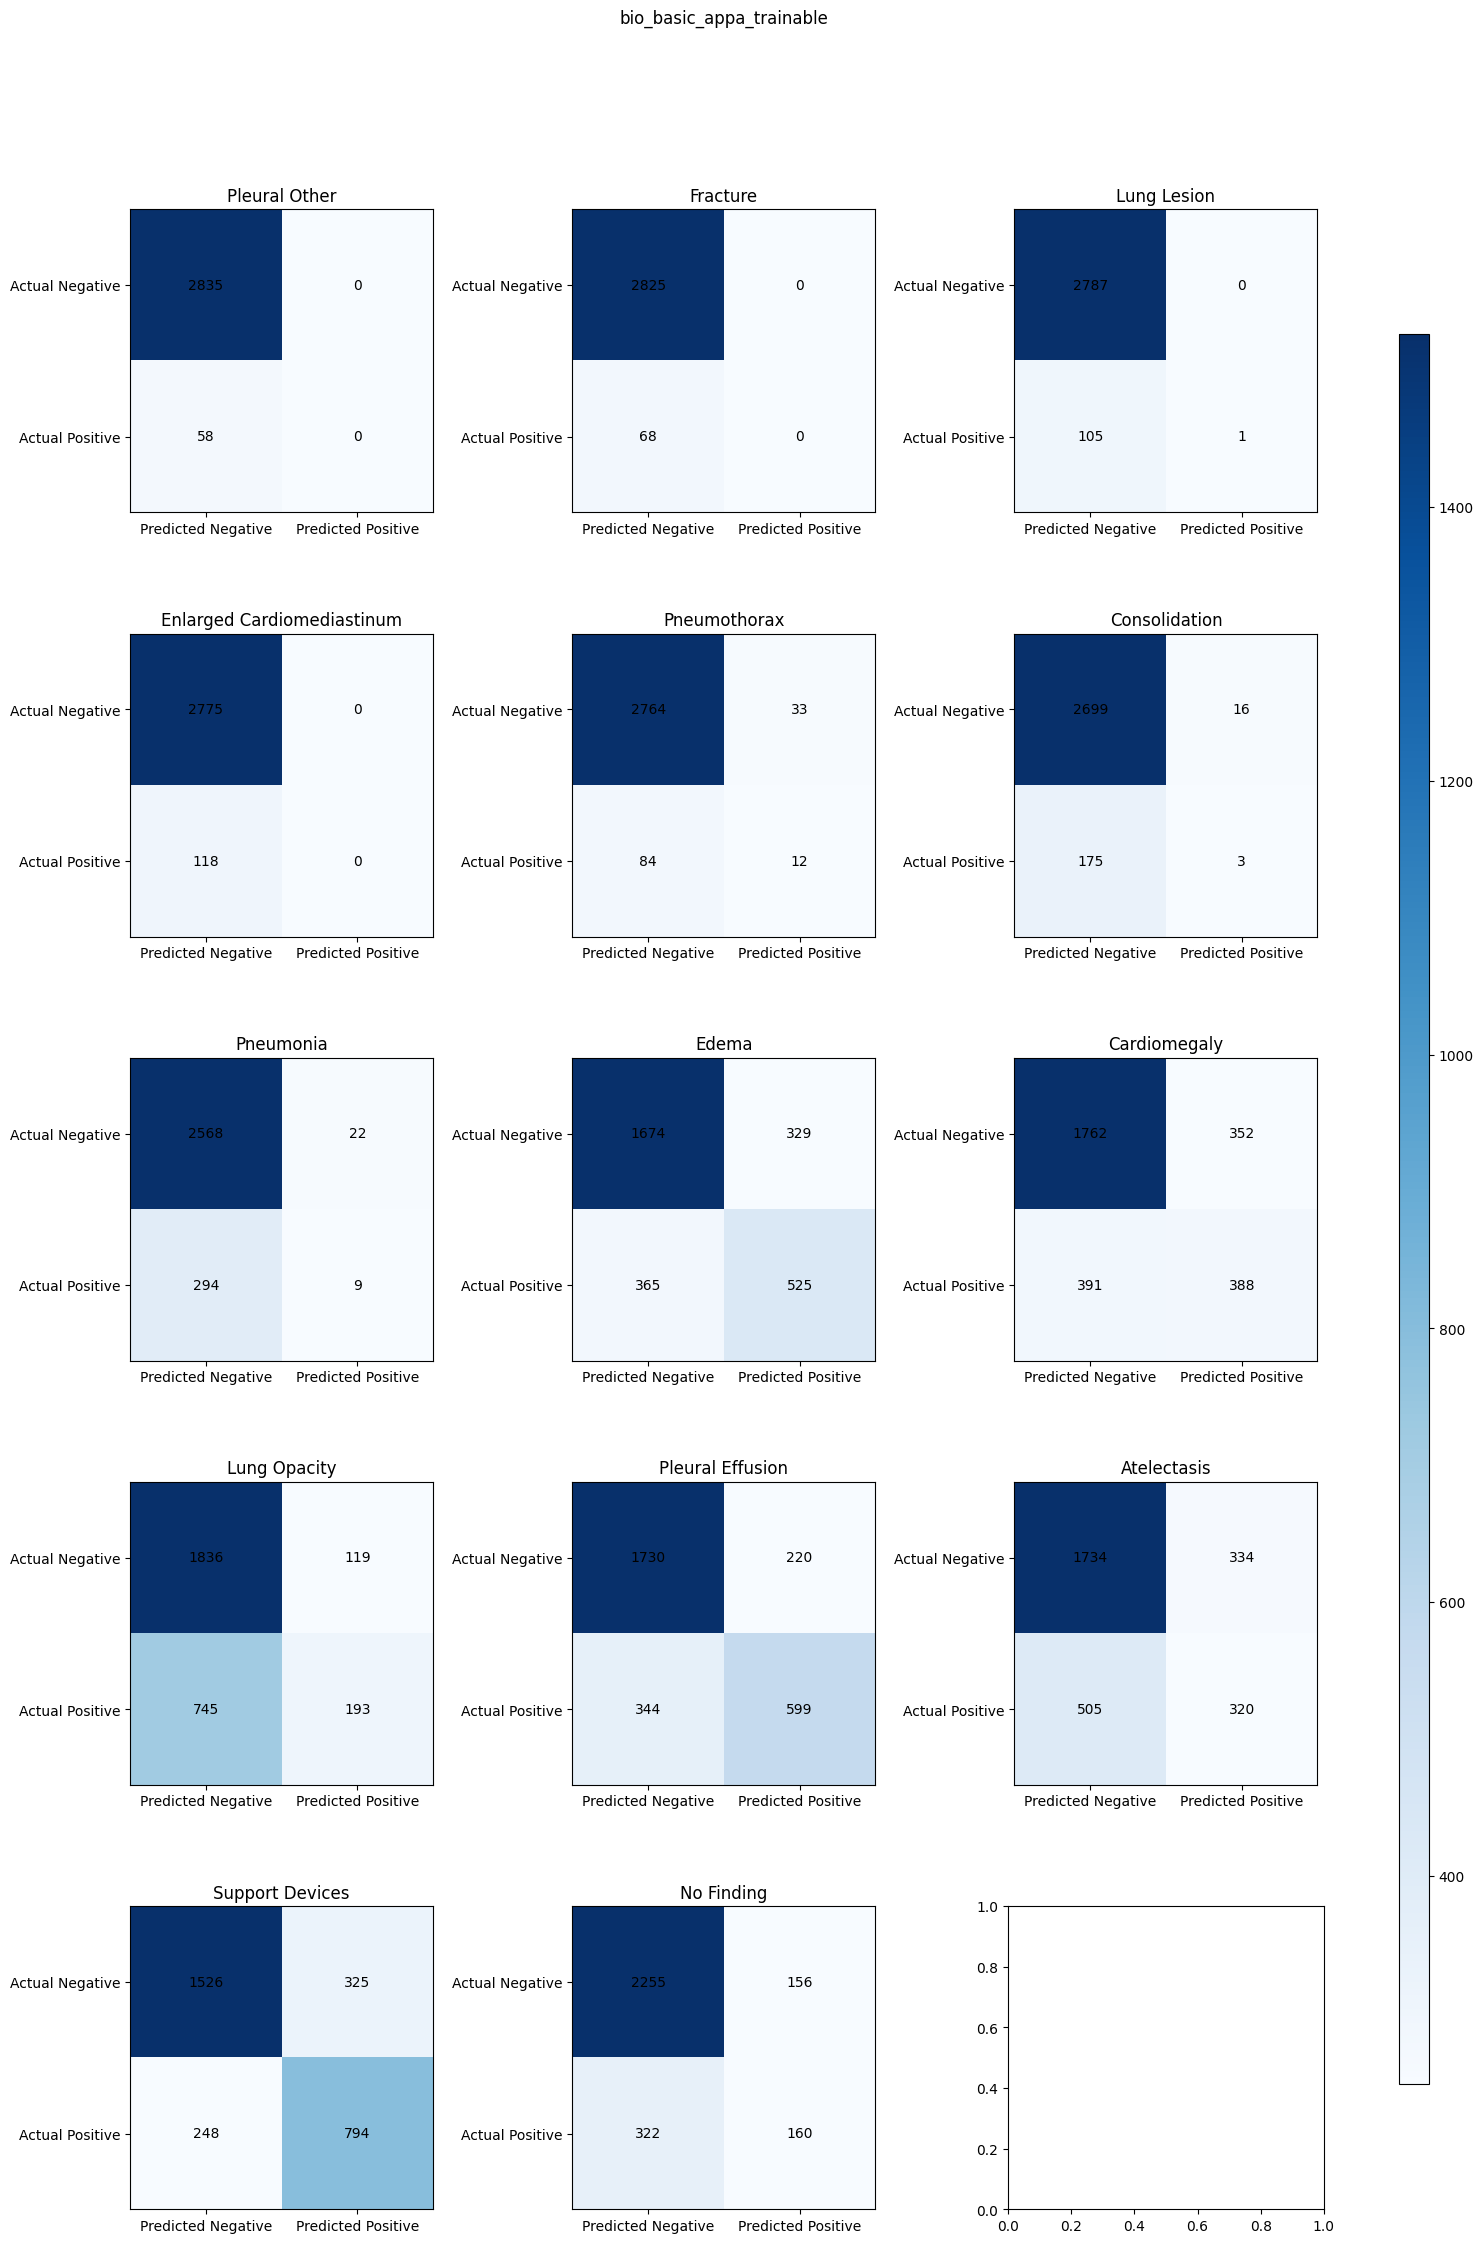

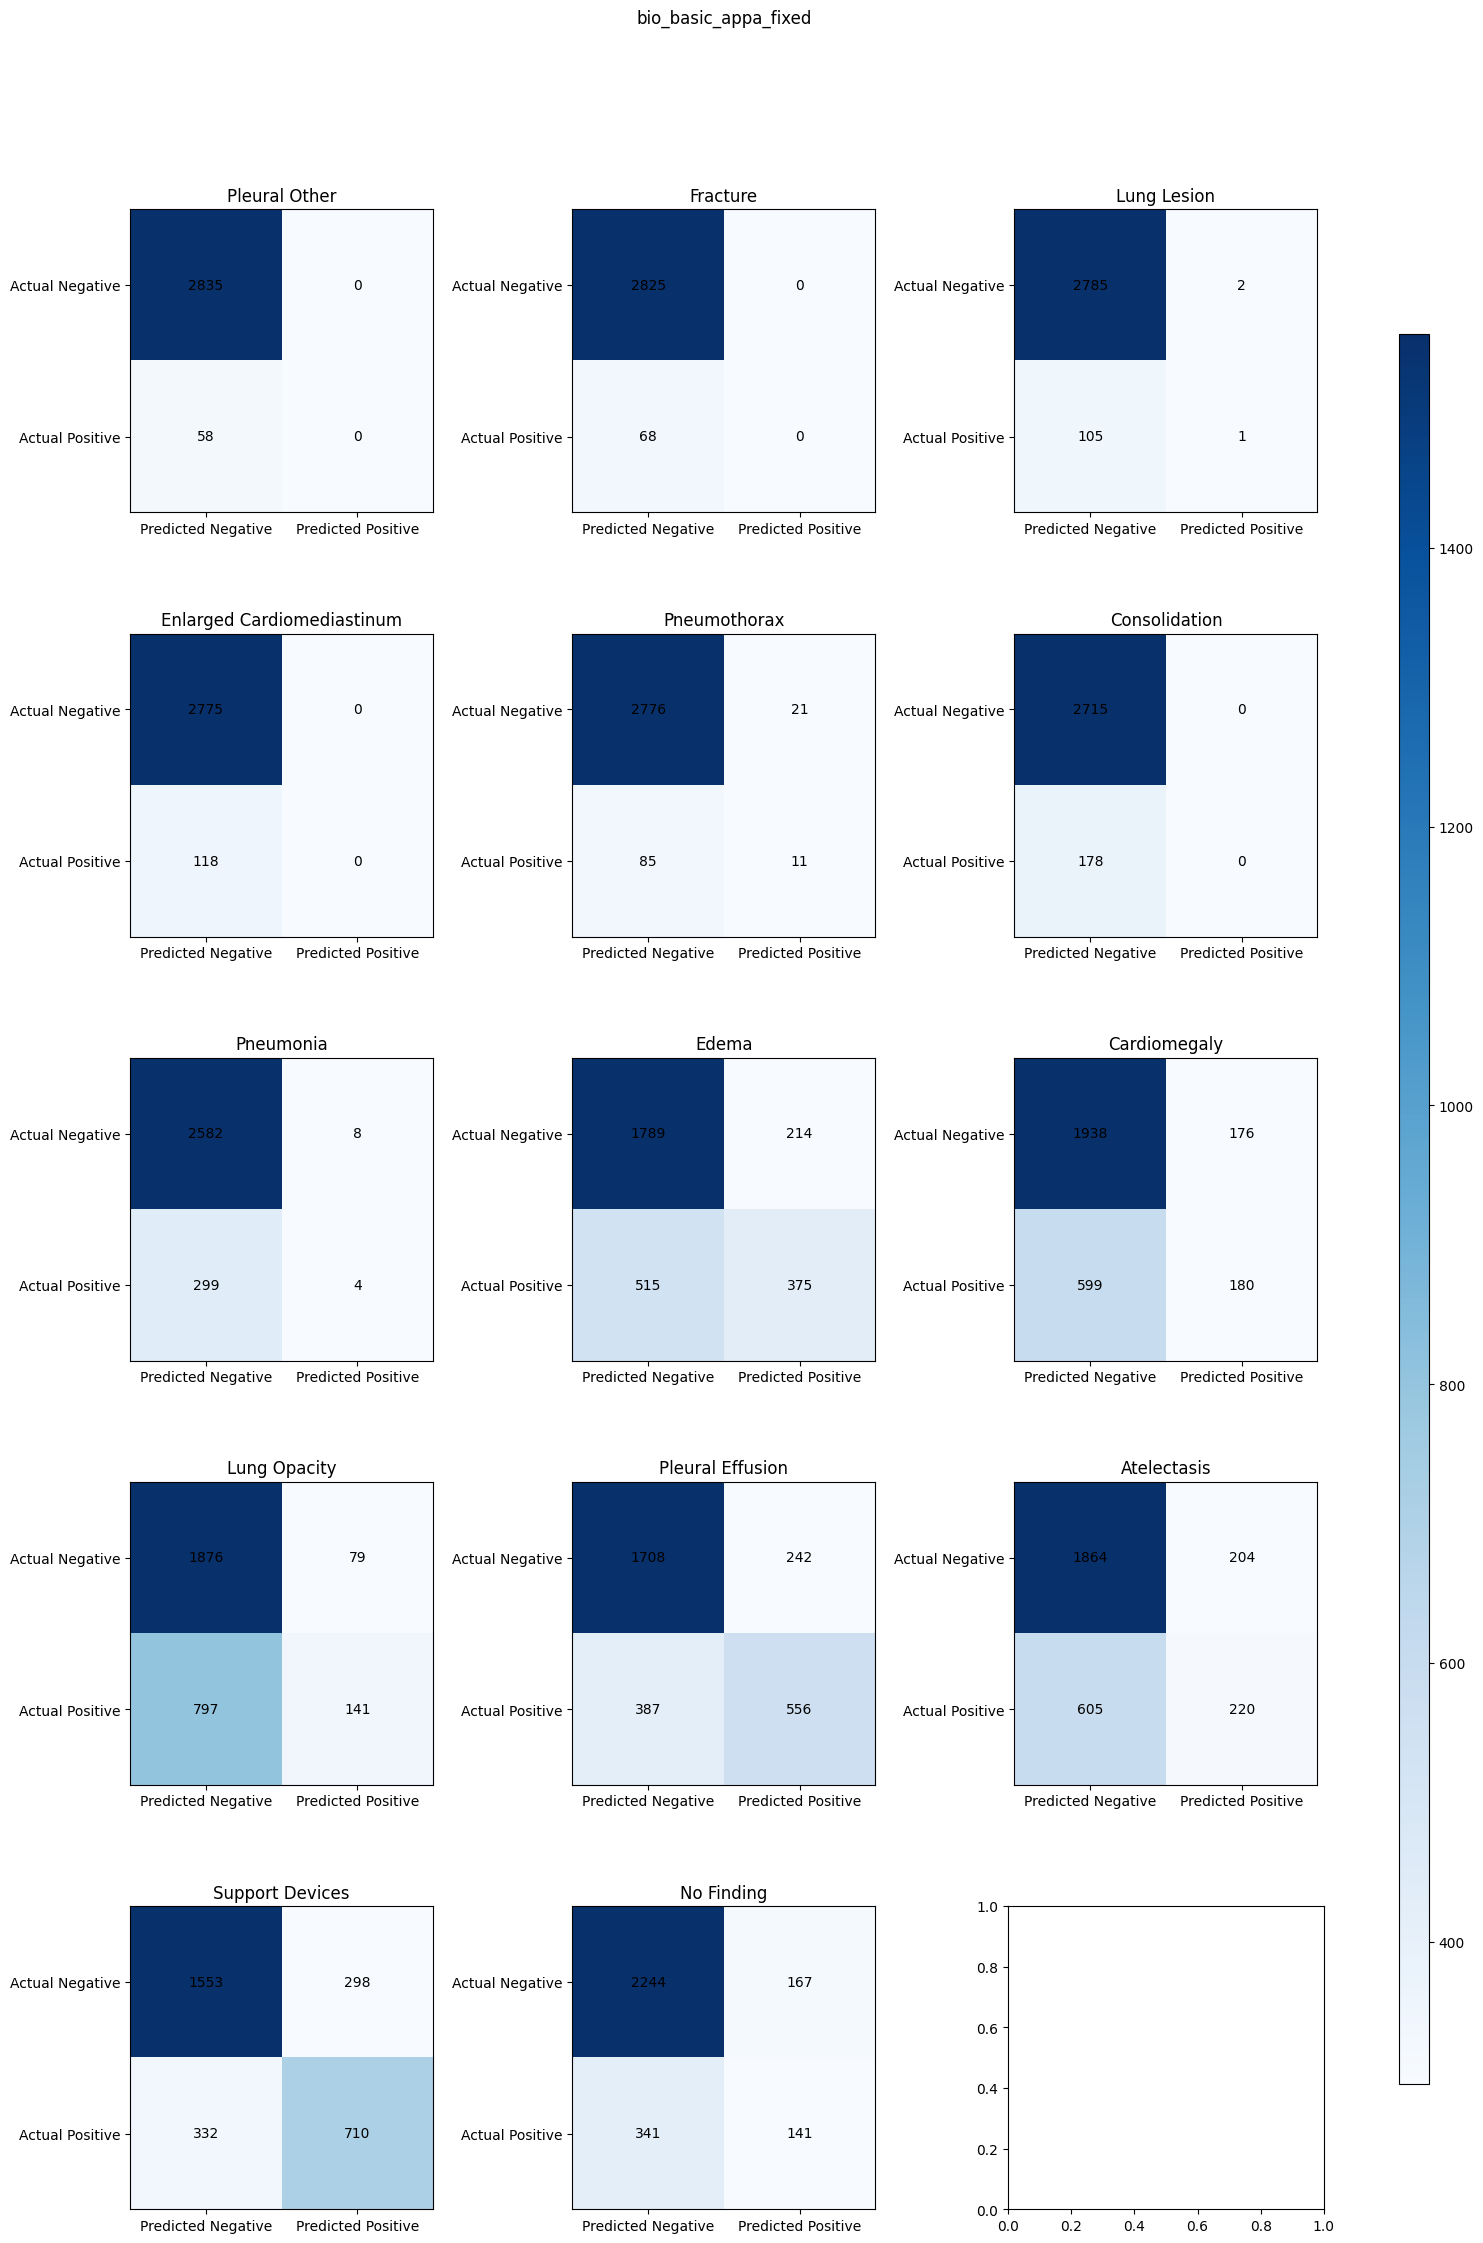

array([[[1864,  204],
        [ 605,  220]],

       [[1938,  176],
        [ 599,  180]],

       [[2715,    0],
        [ 178,    0]],

       [[1789,  214],
        [ 515,  375]],

       [[2775,    0],
        [ 118,    0]],

       [[2825,    0],
        [  68,    0]],

       [[2785,    2],
        [ 105,    1]],

       [[1876,   79],
        [ 797,  141]],

       [[2244,  167],
        [ 341,  141]],

       [[1708,  242],
        [ 387,  556]],

       [[2835,    0],
        [  58,    0]],

       [[2582,    8],
        [ 299,    4]],

       [[2776,   21],
        [  85,   11]],

       [[1553,  298],
        [ 332,  710]]])

In [4]:
plot_confusion_result(densenet_contrastive, "densenet_contrastive", save = True)
plot_confusion_result(densenet_only_APPA, "densenet_only_APPA", save = True)
plot_confusion_result(biomed_trainable_vision_only_APPA, "biomed_trainable_vision_only_APPA", save = True)
plot_confusion_result(biomed_trainable_APPA, "biomed_trainable_APPA", save = True)
plot_confusion_result(biomed_APPA, "biomed_APPA", save = True)
plot_confusion_result(bio_des_diag_appa_trainable, "bio_des_diag_appa_trainable", save = True)
plot_confusion_result(bio_des_diag_appa_fixed, "bio_des_diag_appa_fixed", save = True)
plot_confusion_result(bio_basic_appa_trainable, "bio_basic_appa_trainable", save = True)
plot_confusion_result(bio_basic_appa_fixed, "bio_basic_appa_fixed", save = True)

## comparison between `densenet_contrastive` and `densenet_only_APPA`

In [6]:
densenet_contrastive_p = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/None_dis_diag_des_False_densenet_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True_False/tensor.pth"
densenet_only_APPA_p = "/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/None_basic_True_densenet_None_False_NA_False_False_False_False_NA_S1_1_1_1_1_0_True/tensor.pth"


densenet_contrastive = torch.load(densenet_contrastive_p, map_location=torch.device(device))
densenet_only_APPA = torch.load(densenet_only_APPA_p, map_location=torch.device(device))

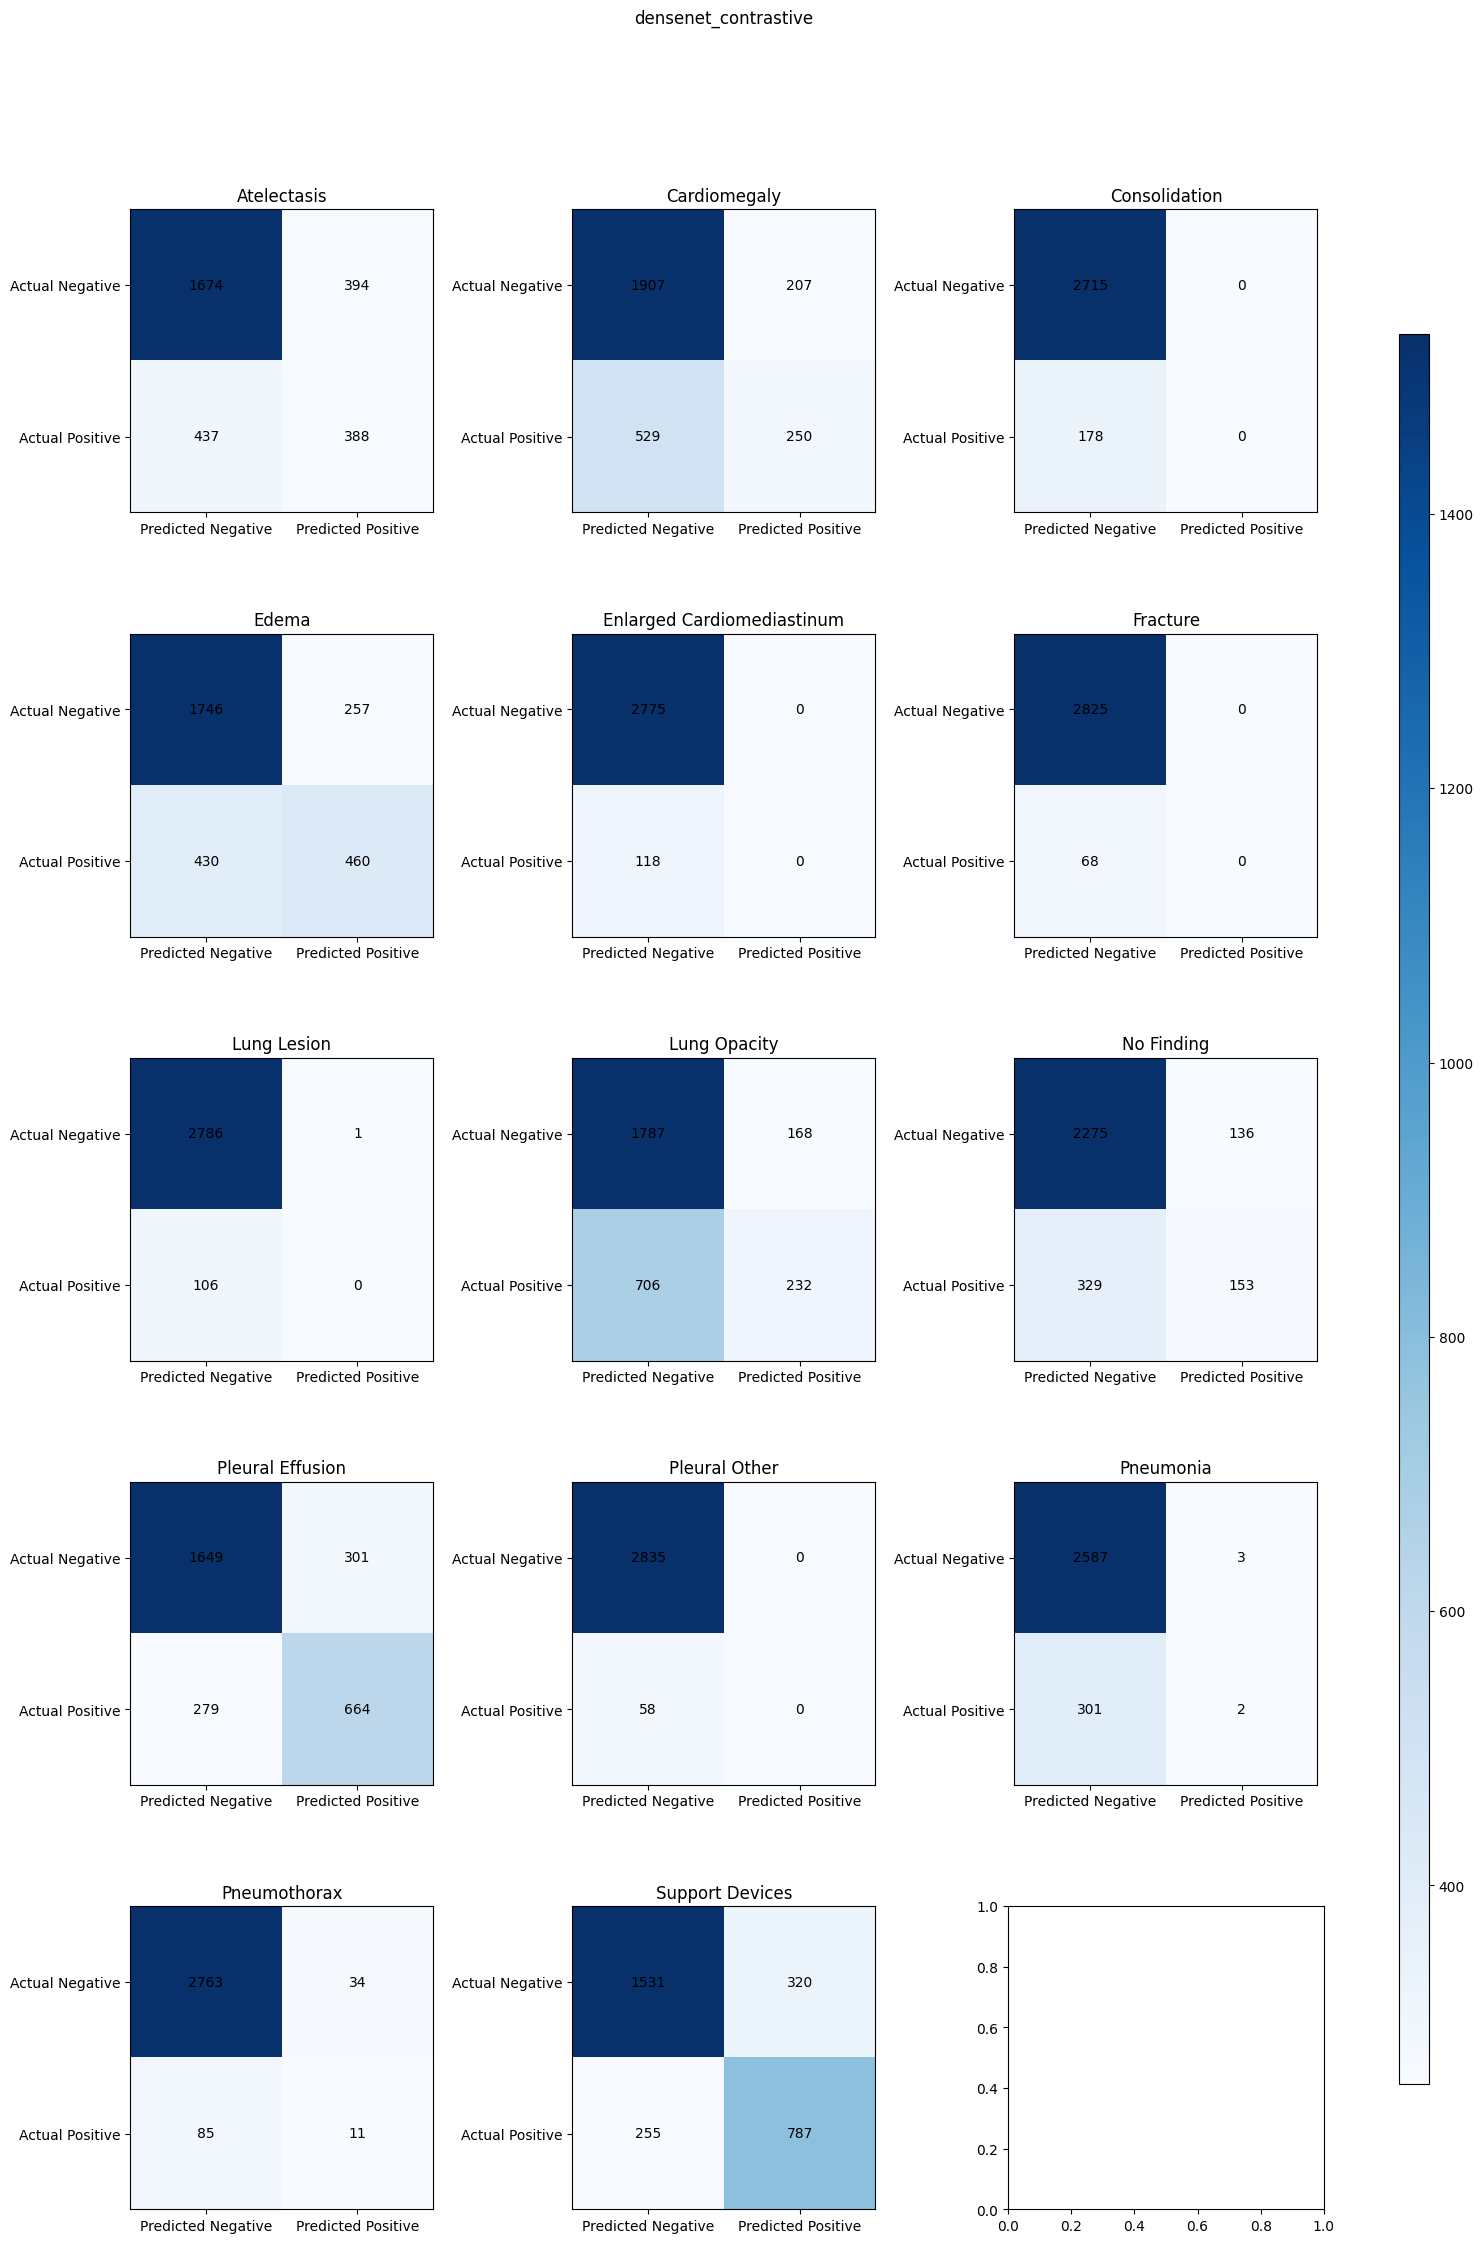

In [4]:
a = plot_confusion_result(densenet_contrastive, "densenet_contrastive")

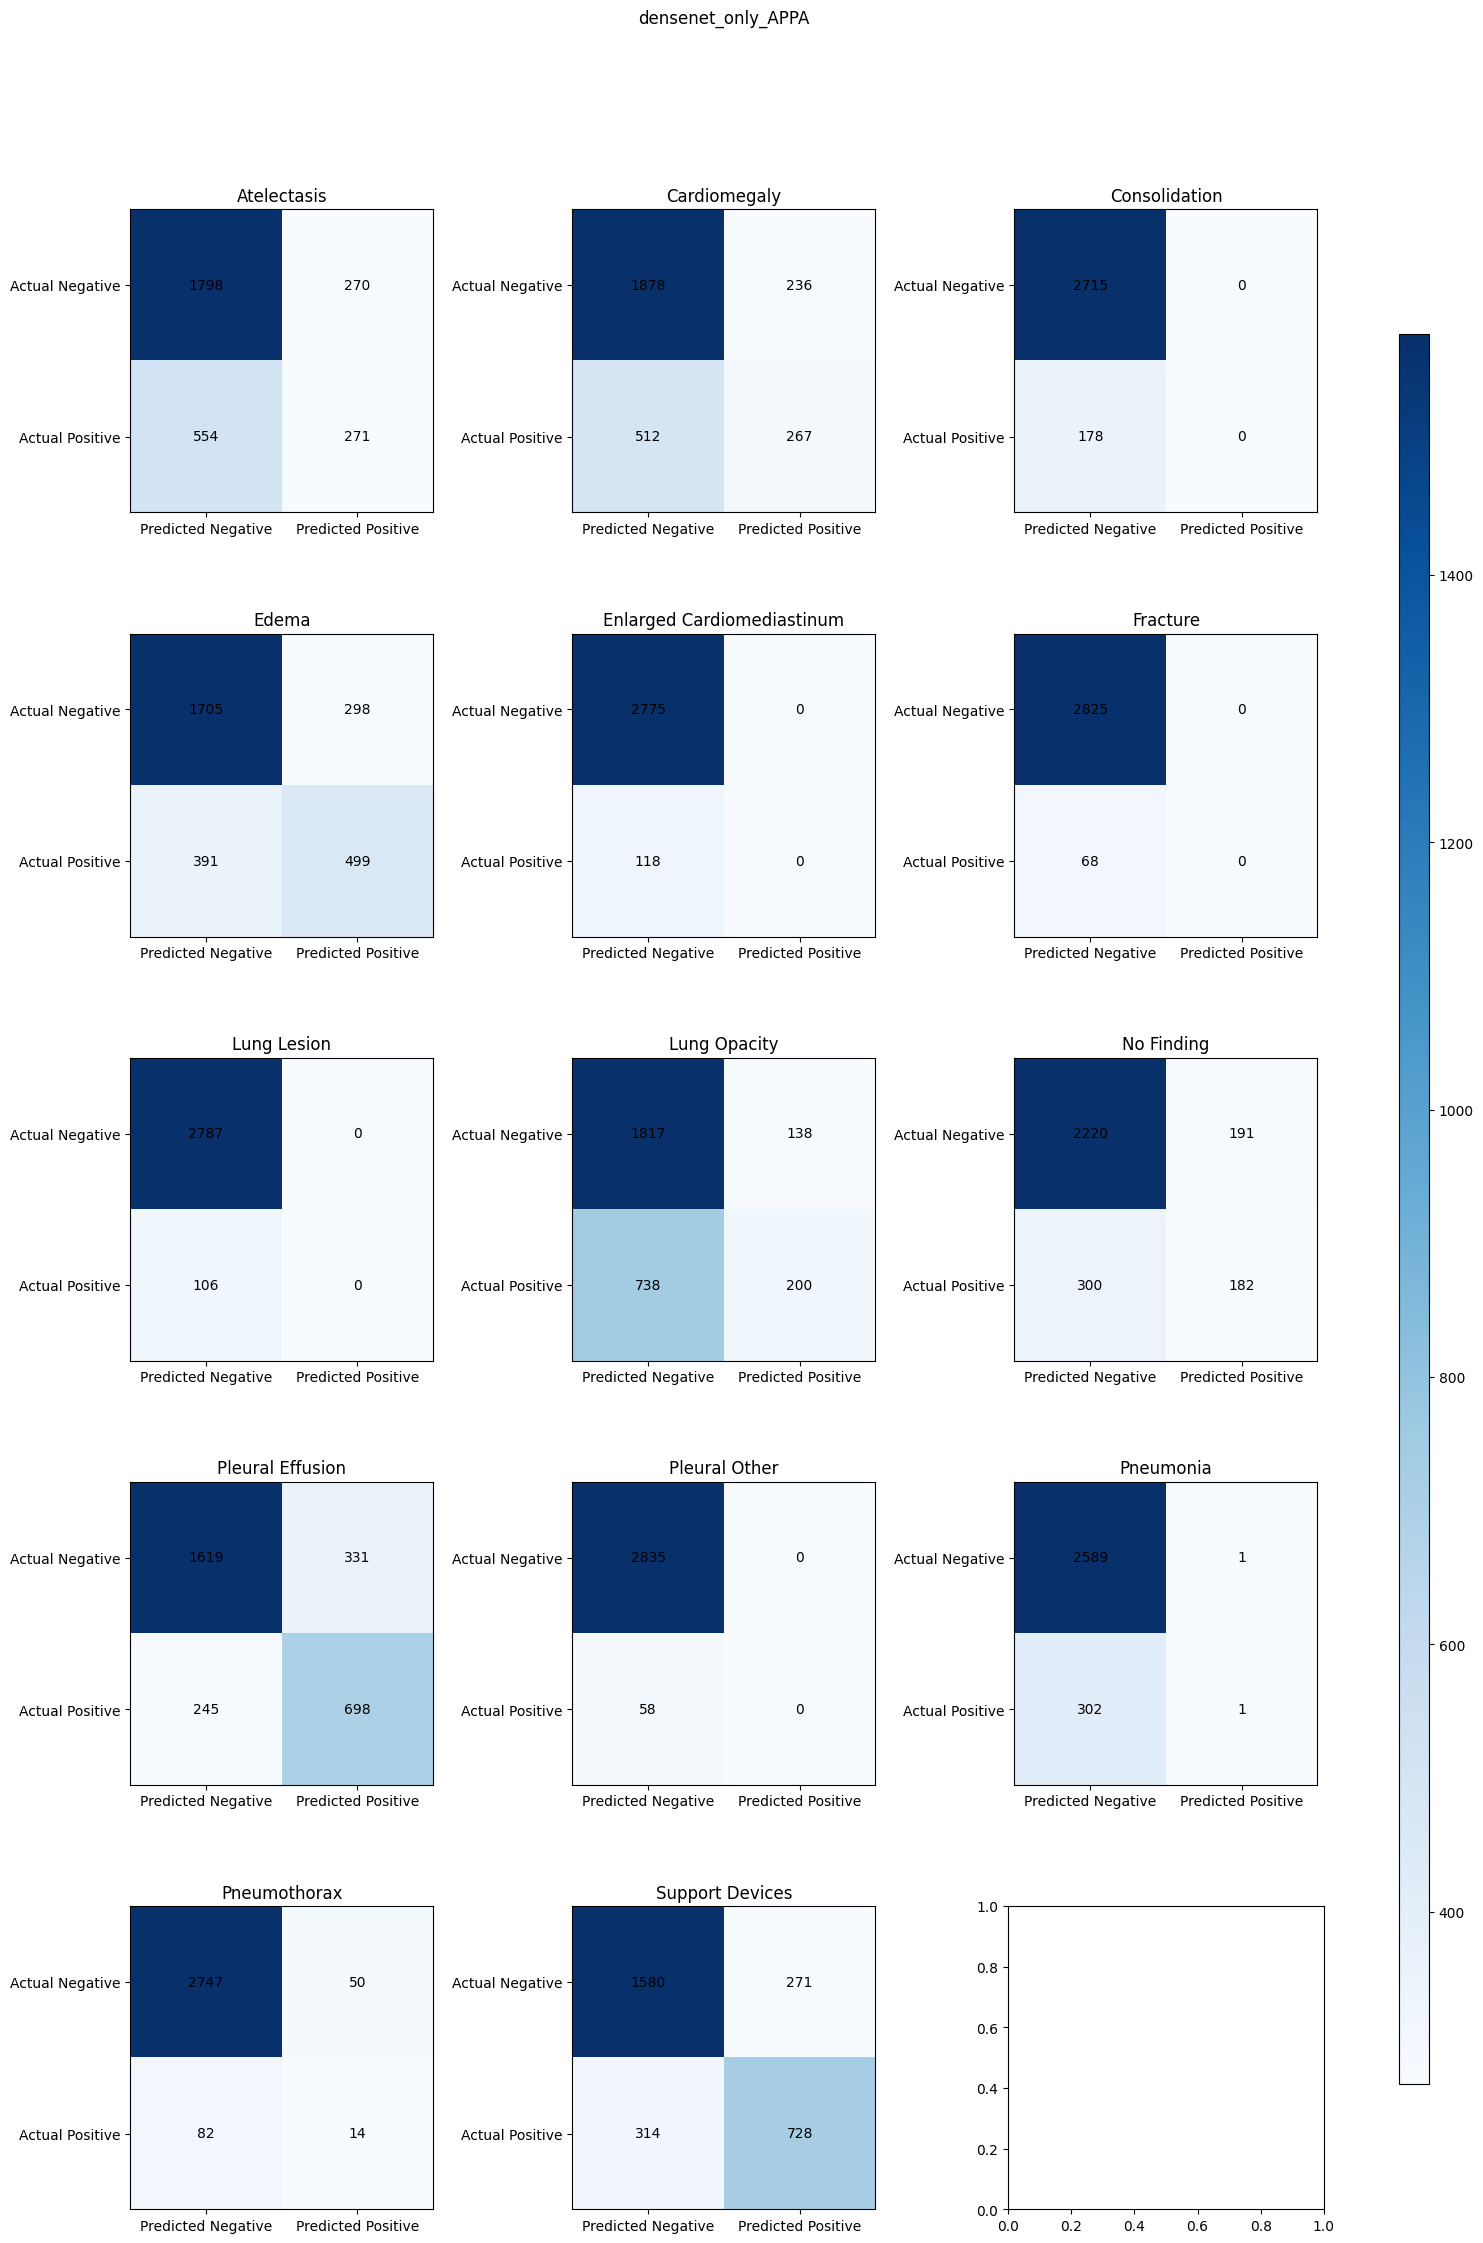

In [7]:
b = plot_confusion_result(densenet_only_APPA, "densenet_only_APPA")
  

In [ ]:
c = a == b

diff = []
for i,j in enumerate(c):
  if False not in j:
    diff.append(i)
print(diff)

# print(constants.CHEXPERT_LABELS[diff])

result = [constants.CHEXPERT_LABELS[idx] for idx in diff]
result
#以下的这些label 的预测结果（confusion）在这两种配置中也是完全一致的


[2, 4, 5, 10]


['Consolidation', 'Enlarged Cardiomediastinum', 'Fracture', 'Pleural Other']

## comparison between `bio_basic_appa_trainable` and `densenet_only_APPA`

从confusion matrix 上观察，引入text branch后确实使得模型在不平衡的数据上直接选择majority，而是会有更为多样的prediction  
但是这样在测试集合上也引入了一些性能下降的问题

结合[auc analysis notebook](./auc_analysis_1.ipynb),  `bio_basic_appa_trainable`在三个类别上的效果下降， 分别为 `fracture`, `pleural other` and `Pneumonia`, 这三个类别的data distribution都是imbalanced， 在引入了textual，可以增加confusion matrix `TP`的量, 我理解TP应该是更难预测的，因此positive在training中是少数，模型统一选择majority是一个最简单最保守的做法。但是与此同时，也增加了`Pneumonia`中FP的数量 -- 更容易将Negative预测为positive。 （即使confusion matrix
中的其他三个位置的指标都变得更好了）

In [9]:
bio_basic_appa_trainable_P = '/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/src/output/dump_prediction_output/biomedclip_basic_False_None_None_False_binary_False_False_False_False_task_balance_S1_1_1_1_1_0_True_True_False/tensor.pth'

bio_basic_appa_trainable = torch.load(bio_basic_appa_trainable_P, map_location=torch.device(device))



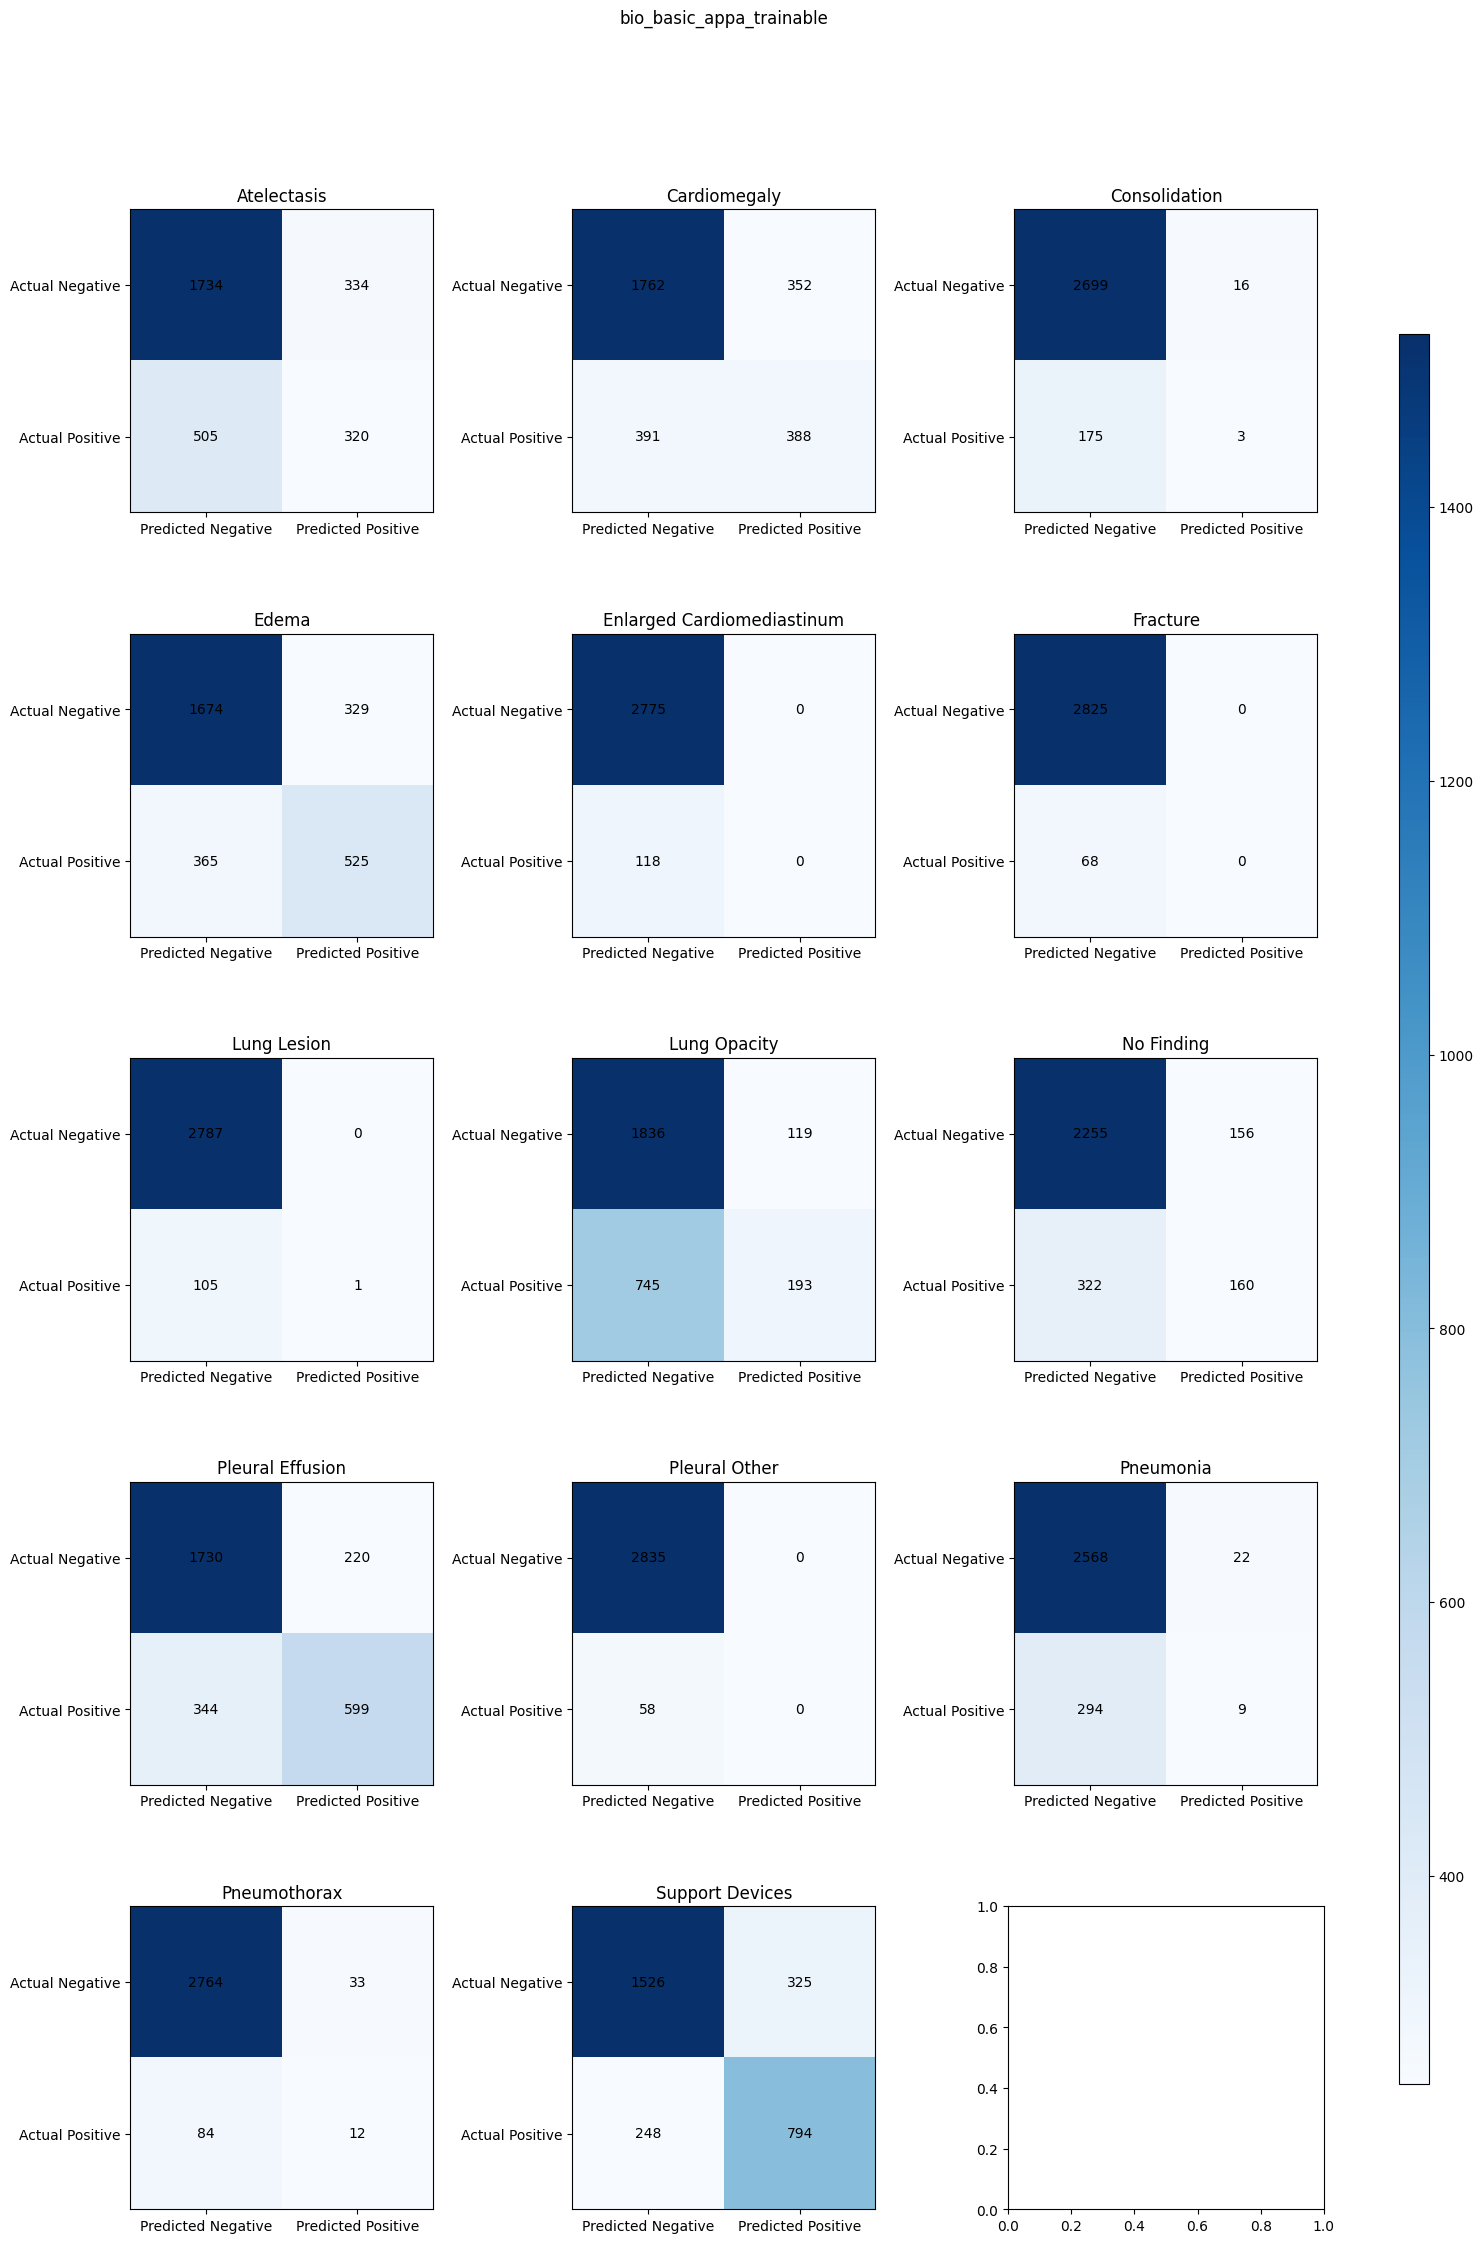

In [12]:
bio_basic_appa_trainable_confusion = plot_confusion_result(bio_basic_appa_trainable, "bio_basic_appa_trainable")

---

In [8]:
# utils.get_Specificity_Precision_Recall_F1()

def get_Specificity_Precision_Recall_F1(tensor_name) :
  tensor_name
  prediction =  (tensor_name["predictions"])
  labels = densenet_contrastive["labels"]
  prediction = torch.sigmoid(prediction)
  threshold = 0.5
  binary_labels = (prediction >= threshold).int()
  res = utils.get_Specificity_Precision_Recall_F1(labels, binary_labels)
  return res
  
res1 = get_Specificity_Precision_Recall_F1(densenet_contrastive)
res = get_Specificity_Precision_Recall_F1(densenet_only_APPA)
print("F1: ", res1, res)

F1:  0.41404754173506336 0.4118285217490195


/home_data/home/v-liudsh/miniconda3/envs/torch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home_data/home/v-liudsh/miniconda3/envs/torch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0.5962113854958653 0.5960663371655421

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

In [ ]:
tensor_name = densenet_only_APPA
prediction =  (tensor_name["predictions"])
labels = densenet_contrastive["labels"]
prediction = torch.sigmoid(prediction)
threshold = 0.5
binary_labels = (prediction >= threshold).int()

print(classification_report(labels, binary_labels))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40       825
           1       0.53      0.34      0.42       779
           2       0.00      0.00      0.00       178
           3       0.63      0.56      0.59       890
           4       0.00      0.00      0.00       118
           5       0.00      0.00      0.00        68
           6       0.00      0.00      0.00       106
           7       0.59      0.21      0.31       938
           8       0.49      0.38      0.43       482
           9       0.68      0.74      0.71       943
          10       0.00      0.00      0.00        58
          11       0.50      0.00      0.01       303
          12       0.22      0.15      0.18        96
          13       0.73      0.70      0.71      1042

   micro avg       0.62      0.42      0.50      6826
   macro avg       0.35      0.24      0.27      6826
weighted avg       0.55      0.42      0.46      6826
 samples avg       0.50   

/home_data/home/v-liudsh/miniconda3/envs/torch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home_data/home/v-liudsh/miniconda3/envs/torch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home_data/home/v-liudsh/miniconda3/envs/torch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

In [ ]:
tensor_name = densenet_contrastive
prediction =  (tensor_name["predictions"])
labels = densenet_contrastive["labels"]
prediction = torch.sigmoid(prediction)
threshold = 0.5
binary_labels = (prediction >= threshold).int()

print(classification_report(labels, binary_labels))

              precision    recall  f1-score   support

           0       0.50      0.47      0.48       825
           1       0.55      0.32      0.40       779
           2       0.00      0.00      0.00       178
           3       0.64      0.52      0.57       890
           4       0.00      0.00      0.00       118
           5       0.00      0.00      0.00        68
           6       0.00      0.00      0.00       106
           7       0.58      0.25      0.35       938
           8       0.53      0.32      0.40       482
           9       0.69      0.70      0.70       943
          10       0.00      0.00      0.00        58
          11       0.40      0.01      0.01       303
          12       0.24      0.11      0.16        96
          13       0.71      0.76      0.73      1042

   micro avg       0.62      0.43      0.51      6826
   macro avg       0.35      0.25      0.27      6826
weighted avg       0.55      0.43      0.47      6826
 samples avg       0.50   

/home_data/home/v-liudsh/miniconda3/envs/torch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home_data/home/v-liudsh/miniconda3/envs/torch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home_data/home/v-liudsh/miniconda3/envs/torch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m